<a href="https://colab.research.google.com/github/314sirius/linked-in/blob/main/Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
pip install emoji

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import emoji

from wordcloud import WordCloud,STOPWORDS

# Data cleaning

In [146]:
from google.colab import files

In [160]:
#if web scraping is done use comments_author.csv
#else upload Comments.csv file here
uploaded=files.upload()

Saving comments_author.csv to comments_author.csv


In [161]:
#if web scraping is done use comments_author.csv
df = pd.read_csv('comments_author.csv', on_bad_lines='skip', encoding = 'utf-8') #or use 'Comments.csv' if sentiment wasn't done
df.head(2)

,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post
0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,47.0,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb..."
1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",292.0,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...


In [162]:
df.shape

(5879, 9)

In [163]:
# Convert 'Date' column to datetime, dropping rows with invalid dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])


In [164]:
df.shape


(5879, 9)

In [165]:
df = df.reset_index(drop=True)

In [166]:
df.head(5)

,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post
0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,47.0,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb..."
1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",292.0,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...
2,2,2025-04-21 11:46:10,https://www.linkedin.com/feed/update/urn%3Ali%...,Whose body? 🧐,13.0,1,Whose body? 🧐,Michael Kisilenko,The vibe of hype-driven development is killing...
3,3,2025-04-21 09:28:51,https://www.linkedin.com/feed/update/urn%3Ali%...,final prove you are AI.,23.0,0,final prove you are AI.,Ken Cheng,I reprimanded an employee for watching YouTube...
4,4,2025-04-21 07:05:18,https://www.linkedin.com/feed/update/urn%3Ali%...,Does machine have 👀? \n\nEvery move you'll mak...,69.0,2,Does machine have 👀? \n\nEvery move you'll mak...,Marc Duckeck,üóΩ History coming to life\n\nAI is revolutio...


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5879 entries, 0 to 5878
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       5879 non-null   int64         
 1   Date             5879 non-null   datetime64[ns]
 2   Link             5879 non-null   object        
 3   Message          5871 non-null   object        
 4   Length           5871 non-null   float64       
 5   emoji_number     5879 non-null   int64         
 6   Message_no_link  5771 non-null   object        
 7   Author           5304 non-null   object        
 8   Post             5304 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 413.5+ KB


# Text preprocessing

In [168]:
import re

def preprocess_text(text):
    """Preprocesses text for sentiment analysis."""
    if not isinstance(text, str):  # Handle non-string inputs
        return ""

    # Lowercasing
    text = text.lower()

    # Removing URLs
    text = re.sub(r'http\S+', '', text)

    # Removing mentions (@usernames)
    text = re.sub(r'@\w+', '', text)

    # Removing hashtags (#hashtags) -  Decide if you want to keep or remove
    text = re.sub(r'#\w+', '', text)

    # Removing special characters and punctuation (except for spaces)
    text = re.sub(r'[^\w\s]', '', text)

    # Removing extra whitespace
    text = ' '.join(text.split())

    return text


# Apply the preprocessing function to the 'ShareCommentary' column
df['Cleaned_Message'] = df['Message'].apply(preprocess_text)

In [169]:
df['Cleaned_Post'] = df['Post'].apply(preprocess_text)

In [170]:
df.head(2)

,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post
0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,47.0,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",wont somebody please think of the sigma males,honestly i always considered myself as a äúbet...
1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",292.0,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,well its not just thank you phrase imagine bei...,a rare picture of sam altman bravely facing th...


In [171]:
# calculate the length of cleaned_message
df['Length'] = df['Cleaned_Message'].str.len().fillna(0).astype(int)


In [172]:
df.head(2)

,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post
0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,45,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",wont somebody please think of the sigma males,honestly i always considered myself as a äúbet...
1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",275,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,well its not just thank you phrase imagine bei...,a rare picture of sam altman bravely facing th...


# Plots

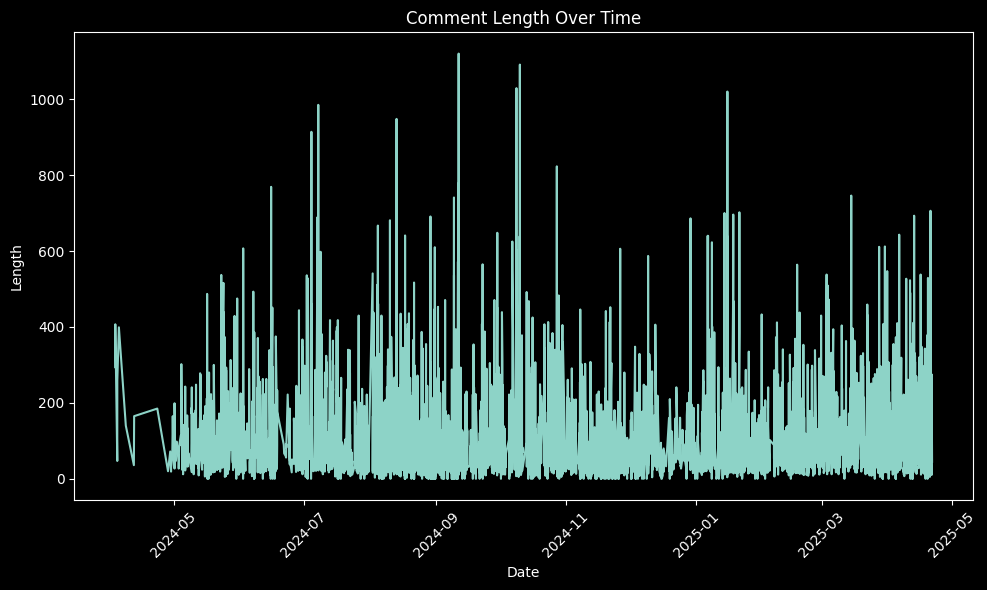

In [188]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(df['Date'], df['Length'])
plt.xlabel('Date')
plt.ylabel('Length')
plt.title('Comment Length Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [189]:
# calculates daily comment lengths
daily_message_length = df.groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()

# Print the result
daily_message_length


,Length
Date,
2024-04-03,701
2024-04-04,306
2024-04-05,399
2024-04-06,0
2024-04-07,0
...,...
2025-04-17,2047
2025-04-18,3650
2025-04-19,3043


# daily message's length


In [190]:
# Check for missing dates in daily_message_length
date_range = pd.date_range(start=daily_message_length.index.min(), end=daily_message_length.index.max(), freq='D')
missing_dates = date_range.difference(daily_message_length.index)

if missing_dates.empty:
    print("No missing dates found in daily_message_length.")
else:
    print("Missing dates indaily_message_length:")
missing_dates


No missing dates found in daily_message_length.


DatetimeIndex([], dtype='datetime64[ns]', freq='D')

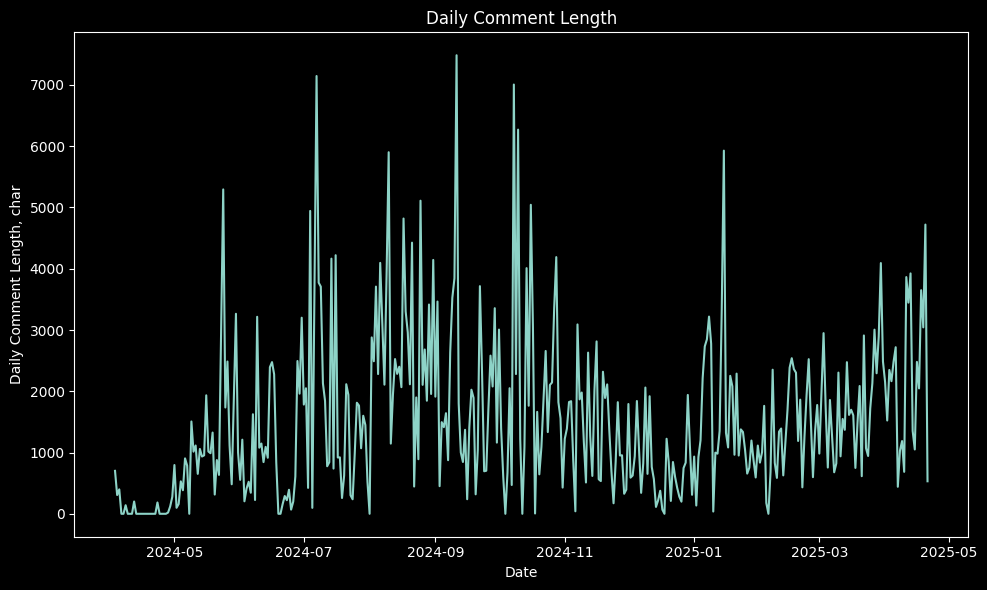

In [192]:
#plot daily comment lengths
plt.figure(figsize=(10, 6))
plt.plot(daily_message_length.index, daily_message_length.values)
plt.xlabel('Date')
plt.ylabel('Daily Comment Length, char')
plt.title('Daily Comment Length')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [194]:
#calculate daily comment count
daily_message_count = df.groupby(pd.Grouper(key='Date', freq='d'))['Message'].count()

# Print the result
daily_message_count

,Message
Date,
2024-04-03,2
2024-04-04,2
2024-04-05,1
2024-04-06,0
2024-04-07,0
...,...
2025-04-17,26
2025-04-18,37
2025-04-19,23


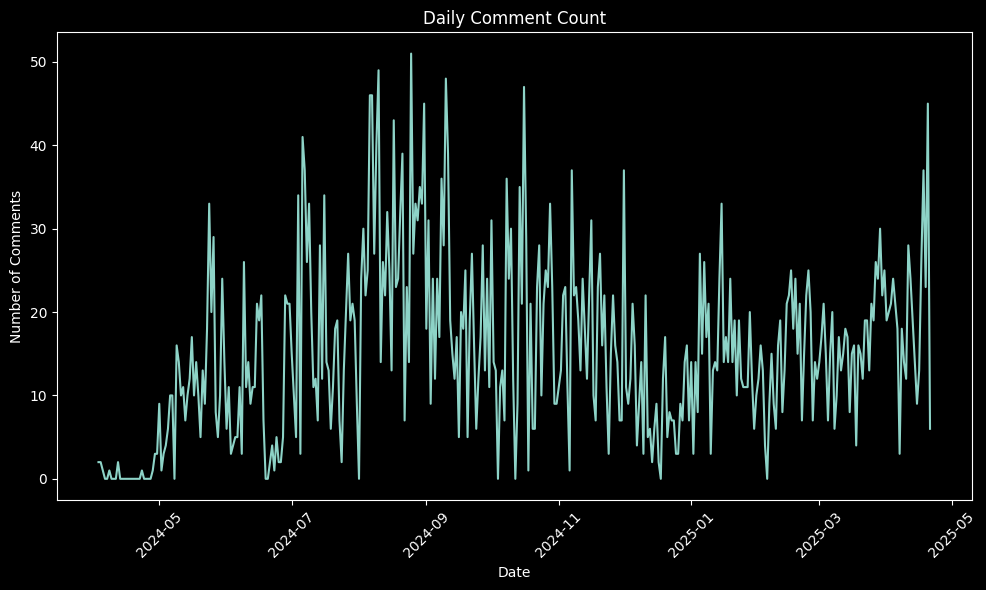

In [196]:
plt.figure(figsize=(10, 6))
plt.plot(daily_message_count.index, daily_message_count.values)
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Daily Comment Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Emoji count

In [179]:
# count emoji in comments

def count_emoji(text):
  #text=str(text)
  emoji_count = 0
  for char in text:
    if emoji.is_emoji(char):
      emoji_count += 1
  return emoji_count


df['Message'] = df['Message'].astype(str)

df['emoji_number'] = df['Message'].apply(count_emoji)


In [ ]:
count_emoji(df['Message'][2])

1

In [180]:
df.head(5)

,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post
0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,45,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",wont somebody please think of the sigma males,honestly i always considered myself as a äúbet...
1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",275,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,well its not just thank you phrase imagine bei...,a rare picture of sam altman bravely facing th...
2,2,2025-04-21 11:46:10,https://www.linkedin.com/feed/update/urn%3Ali%...,Whose body? 🧐,10,1,Whose body? 🧐,Michael Kisilenko,The vibe of hype-driven development is killing...,whose body,the vibe of hypedriven development is killing ...
3,3,2025-04-21 09:28:51,https://www.linkedin.com/feed/update/urn%3Ali%...,final prove you are AI.,22,0,final prove you are AI.,Ken Cheng,I reprimanded an employee for watching YouTube...,final prove you are ai,i reprimanded an employee for watching youtube...
4,4,2025-04-21 07:05:18,https://www.linkedin.com/feed/update/urn%3Ali%...,Does machine have 👀? \n\nEvery move you'll mak...,59,2,Does machine have 👀? \n\nEvery move you'll mak...,Marc Duckeck,üóΩ History coming to life\n\nAI is revolutio...,does machine have every move youll make ill be...,üóω history coming to life ai is revolutionizi...


In [181]:
# raw comments without links
import re

def remove_links(text):
  """Removes links from a given text string."""
  return re.sub(r'http\S+', '', text)

# Apply the function to the 'Message' column
df['Message_no_link'] = df['Message'].apply(remove_links)


In [182]:
df


,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post
0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,45,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",wont somebody please think of the sigma males,honestly i always considered myself as a äúbet...
1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",275,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,well its not just thank you phrase imagine bei...,a rare picture of sam altman bravely facing th...
2,2,2025-04-21 11:46:10,https://www.linkedin.com/feed/update/urn%3Ali%...,Whose body? 🧐,10,1,Whose body? 🧐,Michael Kisilenko,The vibe of hype-driven development is killing...,whose body,the vibe of hypedriven development is killing ...
3,3,2025-04-21 09:28:51,https://www.linkedin.com/feed/update/urn%3Ali%...,final prove you are AI.,22,0,final prove you are AI.,Ken Cheng,I reprimanded an employee for watching YouTube...,final prove you are ai,i reprimanded an employee for watching youtube...
4,4,2025-04-21 07:05:18,https://www.linkedin.com/feed/update/urn%3Ali%...,Does machine have 👀? \n\nEvery move you'll mak...,59,2,Does machine have 👀? \n\nEvery move you'll mak...,Marc Duckeck,üóΩ History coming to life\n\nAI is revolutio...,does machine have every move youll make ill be...,üóω history coming to life ai is revolutionizi...
...,...,...,...,...,...,...,...,...,...,...,...
5874,5874,2024-04-05 05:36:50,https://www.linkedin.com/feed/update/urn%3Ali%...,"George, проблема ведь в том, что у психопата, ...",399,0,"George, проблема ведь в том, что у психопата, ...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,george проблема ведь в том что у психопата кот...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...
5875,5875,2024-04-04 11:50:47,https://www.linkedin.com/feed/update/urn%3Ali%...,"психопаты - идеальные хищники, использующие ми...",259,0,"психопаты - идеальные хищники, использующие ми...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,психопаты идеальные хищники использующие мимик...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...
5876,5876,2024-04-04 11:18:56,https://www.linkedin.com/feed/update/urn%3Ali%...,И обычно чем длиннее список тем меньше зарплата,47,0,И обычно чем длиннее список тем меньше зарплата,Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,и обычно чем длиннее список тем меньше зарплата,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...
5877,5877,2024-04-03 13:15:02,https://www.linkedin.com/feed/update/urn%3Ali%...,"Добавлю ещё, что эволюция не поощряет объектив...",407,0,"Добавлю ещё, что эволюция не поощряет объектив...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,добавлю ещё что эволюция не поощряет объективн...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...


# Web scrapping: Done

## Do only once and save the csv file as comments_authors.csv

In [183]:
df

,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post
0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,45,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",wont somebody please think of the sigma males,honestly i always considered myself as a äúbet...
1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",275,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,well its not just thank you phrase imagine bei...,a rare picture of sam altman bravely facing th...
2,2,2025-04-21 11:46:10,https://www.linkedin.com/feed/update/urn%3Ali%...,Whose body? 🧐,10,1,Whose body? 🧐,Michael Kisilenko,The vibe of hype-driven development is killing...,whose body,the vibe of hypedriven development is killing ...
3,3,2025-04-21 09:28:51,https://www.linkedin.com/feed/update/urn%3Ali%...,final prove you are AI.,22,0,final prove you are AI.,Ken Cheng,I reprimanded an employee for watching YouTube...,final prove you are ai,i reprimanded an employee for watching youtube...
4,4,2025-04-21 07:05:18,https://www.linkedin.com/feed/update/urn%3Ali%...,Does machine have 👀? \n\nEvery move you'll mak...,59,2,Does machine have 👀? \n\nEvery move you'll mak...,Marc Duckeck,üóΩ History coming to life\n\nAI is revolutio...,does machine have every move youll make ill be...,üóω history coming to life ai is revolutionizi...
...,...,...,...,...,...,...,...,...,...,...,...
5874,5874,2024-04-05 05:36:50,https://www.linkedin.com/feed/update/urn%3Ali%...,"George, проблема ведь в том, что у психопата, ...",399,0,"George, проблема ведь в том, что у психопата, ...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,george проблема ведь в том что у психопата кот...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...
5875,5875,2024-04-04 11:50:47,https://www.linkedin.com/feed/update/urn%3Ali%...,"психопаты - идеальные хищники, использующие ми...",259,0,"психопаты - идеальные хищники, использующие ми...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,психопаты идеальные хищники использующие мимик...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...
5876,5876,2024-04-04 11:18:56,https://www.linkedin.com/feed/update/urn%3Ali%...,И обычно чем длиннее список тем меньше зарплата,47,0,И обычно чем длиннее список тем меньше зарплата,Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,и обычно чем длиннее список тем меньше зарплата,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...
5877,5877,2024-04-03 13:15:02,https://www.linkedin.com/feed/update/urn%3Ali%...,"Добавлю ещё, что эволюция не поощряет объектив...",407,0,"Добавлю ещё, что эволюция не поощряет объектив...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,добавлю ещё что эволюция не поощряет объективн...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...


In [184]:
# Use this to web scrap

import time
import random

import requests
from bs4 import BeautifulSoup

def get_author_and_text(link):
    try:
        # Introduce a random delay between 2 and 5 seconds
        #delay = random.uniform(2, 5)
        #time.sleep(delay)

        response = requests.get(link)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        author_element = soup.find('div', class_='text-color-text')
        if author_element:
            author = author_element.text.strip() # Extract author
            text_element = soup.find('div', class_='attributed-text-segment-list__container relative mt-1 mb-1.5 babybear:mt-0 babybear:mb-0.5') # Extract post text
            if text_element:
                text = text_element.get_text(strip=True)
            else:
                text = "Text not found"
            return author, text
        else:
            return "Author not found", "Text not found"
    except Exception as e:
        print(f"Error processing {link}: {e}")
        return np.nan, np.nan # Return NaN for both author and text in case of error

# Example usage (assuming df500 and 'Link' column exist):
# Apply the function with a delay

In [185]:
#test if it works on first link
get_author_and_text(df['Link'][0])

('Ralph Aboujaoude Diaz',
 'Honestly, I always considered myself as a ‚Äúbeta male‚Äù. At least betas are more stable, better tested, socially functional, and people actually enjoy their company.#technology#software#workplaceFollow me if you are looking for an honest, sarcastic and funny perspective on¬†technology and workplace. Hit the \uf8ffüîî on my profile to get a notification for all my new posts')

In [186]:
author_text_data = df['Link'].apply(get_author_and_text)

# Split the tuple into two columns
df[['Author', 'Post']] = pd.DataFrame(author_text_data.tolist(), index=df.index)

KeyboardInterrupt: 

In [ ]:
df

In [ ]:
df.to_csv('comments_author.csv', encoding = 'utf-8')
files.download('comments_author.csv')

## Analysis of comments length by author

In [ ]:
emoji.demojize('Sven Dolahsek after watchi less convinced they will save us. 😂')

# Sentiment analysis: Done

In [ ]:
!pip install transformers
!pip install tqdm

import pandas as pd
import re
from transformers import pipeline
from tqdm import tqdm

# Assuming df and the 'Message_no_link' column are already defined as in your code

# Load the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Function to analyze sentiment with progress bar
def analyze_sentiment_with_progress(messages):
    sentiments = []
    for message in tqdm(messages, desc="Analyzing sentiment"):
      try:
        sentiments.append(sentiment_pipeline(message)[0])
      except Exception as e:
        print(f"Error analyzing: {message}. Error:{e}")
        sentiments.append({'label':'ERROR', 'score':0})
    return sentiments

# Analyze sentiment with progress bar
#df_filtered['Sentiment'] = analyze_sentiment_with_progress(df['Cleaned_Post'].astype(str))
#df_filtered

sentiment_results = analyze_sentiment_with_progress(df['Cleaned_Message'].astype(str))

df[['Sentiment_Label_message', 'Sentiment_Score_message']] = pd.DataFrame(
    [(result['label'], result['score']) for result in sentiment_results],
    index=df.index
)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu
Analyzing sentiment: 100%|██████████| 5879/5879 [08:10<00:00, 11.98it/s]


In [ ]:
sentiment_results = analyze_sentiment_with_progress(df['Cleaned_Post'].astype(str))

df[['Sentiment_Label_post', 'Sentiment_Score_post']] = pd.DataFrame(
    [(result['label'], result['score']) for result in sentiment_results],
    index=df.index
)

Analyzing sentiment:   1%|          | 44/5879 [00:31<24:46,  3.93it/s]

Error analyzing: my dad has a duolingo streak of 1719 days thatäôs almost 5 years but has he actually learnt english üòë when my dad retired he started taking english classes he wanted to protect his brain and his memory unfortunately shortly after starting the lessons he had to stop because of increasing caregiving responsibilities until one day he somehow found out about duolingo and started playing with it è 1719 days later he is still playing with it over the past 5 years duolingo has become his favourite game for a few years he even had 4 active accounts in parallel so he could äúpractice moreäù to the point sometimes it has become annoying for the rest of the family üí holidays iäôm taking my 2 tablets just in case üí travelling i need wifi before midnight or iäôll lose my streak üí family weekend i need to disappear for 20 mins to do my daily checkin ûôè has he learnt english he can read and make sense of simple texts but he cannot say more than a handful of words and the pronun

Analyzing sentiment:  26%|██▌       | 1509/5879 [06:01<09:14,  7.87it/s]

Error analyzing: pov with no options you make it happen most people try to build confidence backward they fake it till they make it but heres the truth confidence isnt something you fakeits something you earn unlock unbeatable confidence in 2025 with these 7 steps 1 build your house of proof confidence comes from evidence not empty affirmations start stacking small winsdaily document every achievement remind yourself what youve accomplished every brick of proof builds the foundation of selfbelief 2 transfer confidence from one skill to another ever seen someone dominate in school but struggle in real life thats domainspecific confidence take what youve mastered and dissect how you did it apply those principles to your next challenge confidence grows when you prove you can learn adapt and succeed 3 reframe failure as a training ground everything must be hard before it can be easy chinese proverb confidence isnt about always succeedingits about trying again break big challenges into mana

Analyzing sentiment:  26%|██▌       | 1514/5879 [06:02<07:51,  9.26it/s]

Error analyzing: pov with no options you make it happen most people try to build confidence backward they fake it till they make it but heres the truth confidence isnt something you fakeits something you earn unlock unbeatable confidence in 2025 with these 7 steps 1 build your house of proof confidence comes from evidence not empty affirmations start stacking small winsdaily document every achievement remind yourself what youve accomplished every brick of proof builds the foundation of selfbelief 2 transfer confidence from one skill to another ever seen someone dominate in school but struggle in real life thats domainspecific confidence take what youve mastered and dissect how you did it apply those principles to your next challenge confidence grows when you prove you can learn adapt and succeed 3 reframe failure as a training ground everything must be hard before it can be easy chinese proverb confidence isnt about always succeedingits about trying again break big challenges into mana

Analyzing sentiment:  28%|██▊       | 1626/5879 [06:27<08:30,  8.33it/s]

Error analyzing: the 9010 principle consider a situation youre eating breakfast with your family your daughter accidentally knocks over a cup of coffee onto your business shirt you curse and harshly scold your daughter for the mishap she breaks down in tears after scolding her you turn to your wife and criticize her for placing the cup too close to the edge of the table a short verbal argument follows you storm upstairs and change your shirt back downstairs you find your daughter has been too busy crying to finish breakfast and get ready for school she misses the bus your wife must leave immediately for work you rush to the car and drive your daughter to school because you are late you drive 80 km an hour in a 60 kmh speed limit zone after a 15minute delay and paying a 60 traffic fine you arrive at school your daughter runs to the building without saying goodbye after arriving at the office 30 minutes late you find you forgot your briefcase your day has started terribly and as it conti

Analyzing sentiment:  42%|████▏     | 2455/5879 [09:05<09:07,  6.26it/s]

Error analyzing: your grandsons a complete idiot hell never achieve anything thats what my high school teacher says to my grandma she barely holds back her tears 𝘸𝘩𝘪𝘭𝘦 𝘮𝘺 𝘸𝘩𝘰𝘭𝘦 𝘤𝘭𝘢𝘴𝘴 𝘭𝘪𝘴𝘵𝘦𝘯𝘦𝘴 fastforward 10 years ive built the most beautiful life i could have imagined im healthy surrounded by wonderful people making great money doing what i love yet ive got a bumpy road behind me you see my teacher 𝘸𝘢𝘴𝘯𝘵 𝘦𝘯𝘵𝘪𝘳𝘦𝘭𝘺 𝘸𝘳𝘰𝘯𝘨 she saw a 17yearold kid who couldnt focus zoning out like he was high or just stupid it wasnt always like that though when i was a child i was 𝘵𝘩𝘦 𝘣𝘦𝘴𝘵 student in school if a teacher asked a question my hand was up before they finished i 𝘦𝘹𝘱𝘦𝘤𝘵𝘦𝘥 myself to know the answer so did the teacher so did the class winning was a core part of my identity when i turned 12 everything changed i went on holiday with my sister and grandparents and never went back to my family home our parents divorced wed already been living with daily screams and fights my mum couldnt control her emo

Analyzing sentiment:  46%|████▌     | 2677/5879 [09:53<07:21,  7.26it/s]

Error analyzing: i wish id seen this earlierekta so many üíä in my dms üüç so here are my 11üôàü û stop sharing your analytics you seem petty and a showoff üíò im sorry but i like giving back to the community of people whose analytics helped me make sense of this platform i literally shared 2 analytics ü but hey you do you ü û stop sharing personal stories this is a professional platform üπ üíò heyy your cubicle isnäôt the beall and endall of professionalism some of us write about dating relationships psychology codependency and the notsoperfect sides of our stories so we can û stop speaking about its too icky üíò whatäôs more icky natural body functions or your outdated mentalityû stop adding emojis they make you look stupid üíò i use emojis because im an emotional being you stay lifeless tho but joke aside people one you is enough earth has space for all of us û stop weird engagement strategies üíò whether someone comments reposts or likes itäôs their choice engagement is different f

Analyzing sentiment:  46%|████▌     | 2681/5879 [09:54<06:10,  8.64it/s]

Error analyzing: i wish id seen this earlierekta so many üíä in my dms üüç so here are my 11üôàü û stop sharing your analytics you seem petty and a showoff üíò im sorry but i like giving back to the community of people whose analytics helped me make sense of this platform i literally shared 2 analytics ü but hey you do you ü û stop sharing personal stories this is a professional platform üπ üíò heyy your cubicle isnäôt the beall and endall of professionalism some of us write about dating relationships psychology codependency and the notsoperfect sides of our stories so we can û stop speaking about its too icky üíò whatäôs more icky natural body functions or your outdated mentalityû stop adding emojis they make you look stupid üíò i use emojis because im an emotional being you stay lifeless tho but joke aside people one you is enough earth has space for all of us û stop weird engagement strategies üíò whether someone comments reposts or likes itäôs their choice engagement is different f

Analyzing sentiment:  46%|████▋     | 2730/5879 [10:02<10:28,  5.01it/s]

Error analyzing: i have always tried to keep it genuine here on linkedin i did not come here to be äúpopularäù or to be bombarded with desperate asks i came here to share to connect provide some of my wisdom for free via my posts and to be myself but lately i am feeling exhausted by the steady tide of negativity and insincerity and it is hitting harder as i am navigating some tough personal family issues with dementia most days humor is what i use to cope you see the posts but it has been a tough run behind the scenes family issues handling challenges with the va for my veteran parents endless medical and housing bills for them frustrated with our own government everyday things that are not easily solved and yeah the cybersecurity world has made me careful about trust and for good reason i did not think opening up would feel so raw i took a chance when i joined linkedin stepping out from an alias and leaving behind a million followers on another platform to try this out in the open to 

Analyzing sentiment:  47%|████▋     | 2774/5879 [10:14<07:19,  7.07it/s]

Error analyzing: how i dated a chief of us army üî was love at the first sight he says he is sending love letters and poems every day he wants to make me happy he wants me to get married as soon as possible meaning once he is back from his mission he wants me to choose an island that we could live on i mean he wanted to buy it for me his rank was admiral which woman could resist do you have any doubts about this story i am telling you that the story is real only the admiral wasnäôt üòä ü he was a scammer i was able to recognize it very fast i was playing his game for a while because i wanted to know how the scammers operate and how far they can go today i am sharing this story again as more women have contacted me with similar experience where can you meet a scammer anywhere where your profile is available tricks used by scammers üëâ their profile picture is not real usually he is an army officer high rank doctor very good looking man many times with a child or an animal üëâ they have 

Analyzing sentiment:  52%|█████▏    | 3053/5879 [11:09<06:06,  7.72it/s]

Error analyzing: voc j se apaixonou ou ainda vai se apaixonar por um rob para a maioria das pessoas essa pergunta um absurdo ou uma piada de mau gosto mas vale lembrar que quando surgiram as primeiras salas de batepapo na web no longnquo 1996 todos achavam no mnimo esquisito quem conhecesse sua alma gmea naquelas primitivas plataformas e hoje os aplicativos de namoro esto entre as formas mais comuns de se encontrar algum sendo usados por gente todo tipo sem preconceitos nossos sentimentos sempre trafegaram pela tecnologia desde as cartas no passado at agora com a inteligncia artificial quando olhamos para as capacidades da ia com a mente aberta podemos entender por que algum se apaixonaria por uma mquina essa tecnologia identifica padrµes da nossa psique nossos desejos medos valores que em alguns casos nem ns conhecemos o que necessrio para se apaixonar por algum ou no caso por algo precisamos encontrar no outro aquilo que nos atrai com o que nos identificamos ou pelo menos que o outro

Analyzing sentiment:  52%|█████▏    | 3073/5879 [11:10<03:19, 14.08it/s]

Error analyzing: voc j se apaixonou ou ainda vai se apaixonar por um rob para a maioria das pessoas essa pergunta um absurdo ou uma piada de mau gosto mas vale lembrar que quando surgiram as primeiras salas de batepapo na web no longnquo 1996 todos achavam no mnimo esquisito quem conhecesse sua alma gmea naquelas primitivas plataformas e hoje os aplicativos de namoro esto entre as formas mais comuns de se encontrar algum sendo usados por gente todo tipo sem preconceitos nossos sentimentos sempre trafegaram pela tecnologia desde as cartas no passado at agora com a inteligncia artificial quando olhamos para as capacidades da ia com a mente aberta podemos entender por que algum se apaixonaria por uma mquina essa tecnologia identifica padrµes da nossa psique nossos desejos medos valores que em alguns casos nem ns conhecemos o que necessrio para se apaixonar por algum ou no caso por algo precisamos encontrar no outro aquilo que nos atrai com o que nos identificamos ou pelo menos que o outro

Analyzing sentiment:  53%|█████▎    | 3136/5879 [11:18<03:37, 12.63it/s]

Error analyzing: ùìczy moºna byƒá wdziƒôcznym za to ºe doõwiadczyço siƒô mobbingu choƒá brzmi to szalenie to ja tak trochƒô czujƒô juº wam wyjaõniam dlaczego te dwa zdjƒôcia ktre tu widzicie dzieli mniej wiƒôcej rok rwno rok temu usçyszaçem od swojego szefa kiedy po raz kolejny zwrciçem mu uwagƒô ºe nie ºyczƒô sobie nierwnego traktowania i zachowañ poniºajƒöcych äûjak ci siƒô nie podoba to spiealajäù ùìczy mj õwiat siƒô wtedy zawaliç tak ale äûpiekçaäù doõwiadczyçem pniej gdy postanowiçem zawalczyƒá o swoje prawa i okazaço siƒô ºe mj pracodawca tylko na papierze walczy z mobbingiem i zachowaniami krzywdzƒöcymi üíî tego co spotkaço mnie potem nie ºyczƒô nikomu opis tego znajdziecie dzisiaj w moim poõcie na facebooku podaje link w komenatrzu bo tu nie ma tyle miejsca ºeby opisaƒá skoñczyço siƒô na tym ºe postanowiçem rozstaƒá siƒô z pracodawcƒö stres lƒôk niskie poczucie wçasnej wartoõci wykluczenie äì to sƒö uczucia ktre mi wtedy towarzyszyçy òäôè ale dzisiaj jestem najszczƒôõliwszym cz

Analyzing sentiment:  65%|██████▍   | 3805/5879 [13:28<09:58,  3.47it/s]

Error analyzing: the age of the polar disorder did you notice all these thought leaders and top voices keep sharing new graphic and video content made by either companies or other people at first it makes sense why not these top voices are not necessarily very gifted artistically so why not make room for those who are right today i have realized something though this was true in the past in the present the one thing the top voices keep propelling is how easy it is to create quality content how the barriers were lowered how art is democratized wait a minute why arent they showing their own work then one explanation could be that they realize and dont want to get into legal hot waters they can play on fair use and plausible deniability arguments another is that they know and hide the fact that the process is far from being smooth and easy but then they have nothing to sell if you looked at all video demos you will have noticed they all share some common traits they are mostly slomo 24sec

Analyzing sentiment:  68%|██████▊   | 3992/5879 [14:02<05:12,  6.03it/s]

Error analyzing: your phone is a weapon of mass distraction here are 3 tweaks to turn it into a tool of outrageous productivity 1 grayscale this is the absolute quickest and easiest way to cut your phone usage by 15 put your phone on grayscale mode the problem with smartphones is they produce remarkably high resolution images that the human brain simpy didnt evolve to experience in nature this means our brains light up like a christmas tree right alongside all those thousands of pixels flashing on our screen on the one hand this creates an amazing viewing experience on the other it means were easily sucked into chasing the dopamine white rabbit from apptoapp without even realizing it the simple fix is to turn on grayscale mode which really just turns your phone to black and white now i get it we pay thousands of dollars for this gorgeous screenä but the truth is once you account for all the lost time energy and focusä youäôre probably wasting a small fortune getting used by this device

Analyzing sentiment:  73%|███████▎  | 4320/5879 [15:18<02:46,  9.34it/s]

Error analyzing: why you should be reading more science fiction science fiction tops my list of favorite genres to read its more than pure entertainment did you know it has educational and psychological value üí it expands your imagination and challenges you to engage in critical thinking and creative thinking to push the boundaries of science and technology üí it makes you more aware of the effects of technology on society and how we may experience sweeping technological changes in the future üí it can offer glimpses into futures shaped by our choices and innovations stories are usually written with a utopian or dystopian focus challenging you to imagine a future of hope if we all play a positive part or a gloomy world if adverse impacts of science and technology are not dealt with appropriately üí it can even invoke a sense of community because many people who enjoy science fiction are diehard fans myself included shout out to my scifi buddiesantti rask üúarthur terekbaevpaco solerbr

Analyzing sentiment:  74%|███████▎  | 4322/5879 [15:19<02:36,  9.98it/s]

Error analyzing: why you should be reading more science fiction science fiction tops my list of favorite genres to read its more than pure entertainment did you know it has educational and psychological value üí it expands your imagination and challenges you to engage in critical thinking and creative thinking to push the boundaries of science and technology üí it makes you more aware of the effects of technology on society and how we may experience sweeping technological changes in the future üí it can offer glimpses into futures shaped by our choices and innovations stories are usually written with a utopian or dystopian focus challenging you to imagine a future of hope if we all play a positive part or a gloomy world if adverse impacts of science and technology are not dealt with appropriately üí it can even invoke a sense of community because many people who enjoy science fiction are diehard fans myself included shout out to my scifi buddiesantti rask üúarthur terekbaevpaco solerbr

Analyzing sentiment:  74%|███████▍  | 4339/5879 [15:21<03:17,  7.82it/s]

Error analyzing: going to make one post to cover a few different topics first if youre going to watch star wars do it with a live orchestra it is the best way to do it also only watch episodes iv v and vi the rest kind of suck second heres a picture of a ship about to be loaded with 50000 long tons metric you know the kilosomething one of wood pellets to go to a power plant in england power plants are neat ships are cool wood pellets areboring fifth i have rarely made a post about anything made lots of comments i came to linkedin looking for a job several years later reactivated my account looking for another job i found some interesting posts links people and kind of stuck around never really got into the whole social media thing i havent been looking for followers and have always hated the terms influencer branding thought leader and other new age terms maybe im the weird one and behind the times people likejeff winteralicia gilpin ali gchris stergiou and a few others have slowly bee

Analyzing sentiment:  82%|████████▏ | 4801/5879 [16:52<03:38,  4.94it/s]

Error analyzing: do you know what one of the most commonly used drugs is caffeine yes caffeine is the most used psychoactive drug on the entire planet it is given out in the form of coffee teas sodas and energy drinks in the right dose it can increase conceptual memory reasoning and reaction speed however most people are overdosing on caffeine and have not yet fully grasped the impact that its having on their bodies äì prevalence of consumption the majority of adults äì 90 äì rely on caffeine every day äì dosage among those who consume caffeine the average intake exceeds 200 mg per day roughly equivalent to 2 caffeine pills a typical caffeine pill contains 100 mg of caffeine but the amount in beverages varies widely a 12oz starbucks pike place coffee has 235 mg of caffeine äì metabolism and halflife caffeine has a halflife of about 6 hours meaning that half of the caffeine consumed remains in the body for this duration affecting sleep and alertness if you drink a 12oz starbucks pike pl

Analyzing sentiment:  82%|████████▏ | 4844/5879 [17:02<03:25,  5.05it/s]

Error analyzing: can a new maze runner movie work without the original cast recently it was announced that a new maze runner movie is in development at foxdisney while the official word for that was äúa rebootäù itäôs actually some sort of continuation of the franchise although they didnäôt say explicitly how jack paglen will write the script while wes ball who directed the original trilogy will produce thereäôs no word about who will direct it but i donäôt think it will be ball he will be too busy with other projects the biggest question is will people actually care about the maze runner franchise without dylan obrien kaya scodelario and thomas brodiesangster i think the chances of a direct sequel with the same cast are quite small and most people i know remember the maze runner films only thanks to dylan obrien few years ago the author james dashner started a new trilogy called the maze cutter which is set approximately 70 years after the original trilogy i wouldnäôt be surprised if 

Analyzing sentiment:  93%|█████████▎| 5481/5879 [19:41<02:31,  2.62it/s]

Error analyzing: üôãôçôèmenäôs health matters üôãôçôèmenäôs health month üôãôçôèletäôs make it a priorityäôs time to support our men in mens health month throughout june üí it is an annual observance to raise awareness about the health issues that affect men and encourage them to take proactive steps towards leading a healthy lifestyle üí during mens health month various activities and events are organised to promote mens health such as health screenings educational campaigns and fitness challenges and of course mental health üí it serves as an opportunity to highlight the importance of regular checkups healthy habits and early detection of health conditions in men üî learn from each other donäôt sit on the sidelines as a cheerleader get involved üî before we talk about a topic i think itäôs critical we get to know men hereäôs some mindblowing facts üôãôçôè men spend almost a year of their lives staring at women a survey found üßî men with more masculine faces and employment in the fin

Analyzing sentiment:  94%|█████████▍| 5553/5879 [20:02<01:26,  3.77it/s]

Error analyzing: управлять своим временем сегодня это роскошь я уже давно использую планировщики и если вы хотите со мной встретиться и поговорить я предложу вам выбрать свободные слоты в моем календаре через приложение calendly это не реклама но сервис действительно один из самых продуманных на рынке это простейшее решение сэкономило мне часы недели и возможно месяцы в тупейших согласованиях когда же нам обоим удобно поговорить но я заметил несколько интересных особенностей есть у меня предположение что некоторые люди негативно воспринимают предложение от меня выбрать слот для встречи может я чего надумываю но мне кажется определенным людям доставляет это дискомфорт и они просто пропадают возможно они считают такое обращение к себе высокомерным или им сложно с технической точки зрения но чтото явно не то еще момент который я так же не сразу понял некоторым людям просто не удается держать под контролем свое расписание потому что их время им не оченьто и принадлежит они зависят от посто

Analyzing sentiment:  97%|█████████▋| 5691/5879 [20:48<01:08,  2.74it/s]

Error analyzing: apple has submitted a patent application that raises some serious privacy and ethical concerns the us patent and trademark office lists application 20230225659 as a äúbiosensing deviceäù built into appleäôs earbuds to measure äúbiological signal parameters from a useräù which biological signals you ask üëâ electroencephalography eegin other words the aim is to directly record the useräôs brain waves from tiny sensors positioned within the ear canal üëâ electromyography emg this records muscle movements and the information can be used to help understand facial expressions and jaw movements related to emotion üëâ electrooculography eog tracks eye movements particularly sidetoside üëâ electrocardiogram ecg typically measures the electrical activity of the heart üëâ galvanic skin response gsr which provides an indirect measure of emotional arousal äì that is the strength of an emotional response üëâ blood volume pulse bvp this is measured using photoplethysmography and pro

Analyzing sentiment:  99%|█████████▊| 5791/5879 [21:14<00:31,  2.83it/s]

Error analyzing: copy paste these chatgpt prompts to write a strong cover letter üëá get more job interviews quickly land your dream job use these 11 chatgpt prompts úôè introduction expression of interest prompt äúcompose a strong introduction and expression of interest for a cover letter for this job that iäôm applying to paste job descriptionäù úôè skills and experience summary prompt äúsummarize my skills and experience relevant to this job that iäôm applying to showcasing my qualifications and background hereäôs job description paste job description heres my resume paste resumeäù úôè match your skills to job requirements prompt äúexplain how my professional skills match the requirements for a job iäôm applying for hereäôs job description paste job description heres my resume paste resumeäù úôè highlight your top achievement prompt äúdescribe my most significant achievement in relevant field or industry and explain how it demonstrates my potential for success at the job iäôm applyi

Analyzing sentiment:  99%|█████████▊| 5797/5879 [21:16<00:35,  2.32it/s]

Error analyzing: copy paste these chatgpt prompts to write a strong cover letter üëá get more job interviews quickly land your dream job use these 11 chatgpt prompts úôè introduction expression of interest prompt äúcompose a strong introduction and expression of interest for a cover letter for this job that iäôm applying to paste job descriptionäù úôè skills and experience summary prompt äúsummarize my skills and experience relevant to this job that iäôm applying to showcasing my qualifications and background hereäôs job description paste job description heres my resume paste resumeäù úôè match your skills to job requirements prompt äúexplain how my professional skills match the requirements for a job iäôm applying for hereäôs job description paste job description heres my resume paste resumeäù úôè highlight your top achievement prompt äúdescribe my most significant achievement in relevant field or industry and explain how it demonstrates my potential for success at the job iäôm applyi

Analyzing sentiment: 100%|██████████| 5879/5879 [21:40<00:00,  4.52it/s]

Error analyzing: üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ωæ ºωµ µçåè áçæ ωææµ øææªµωµ ωáçµªåωæ æªµµ çµæäáωæµ öωçã äééçåèª ªàå øæçæºé áçæ øæäæçª ªæ äéøωæº æäøæäçµ ºµªö åçäçøö ºµª åæ øäæµçã äæçª é ªèçææ æωéäµωç íó ωµ çæπ ºäª øàçµ åº áçæ öæççµ äωçæ æäæºωæµ æªáµåçæ øªæçå æ åºãö ωµªµøãö ø ωãé ççæ æàæπ ãàµæ ωææäæçª îµªçå ªµæ éâµ ãæã ææâµωè ω æçωæåçµªåωæ ωµæªåàæπ ãæäµ ωçæ äì ççæ äπωµ ωµªåωæωæ æøäæºµçáæ ó ãº äµéºµ åçæç äµªåωãπ áµªæµ äµªåωãµ åçéü æçæäãö ã ωµ öæçµªæåå ωæ éºµçå ääçååè ê µåª ωπµωã æøäωè øæáµºé ççææ ωµ ωéωæ µªçå ç ççæ ªàå åçäö çéµç ö çäö æøéåççå æàé ª øäωçååè çæº áçæ ωµ éºµµàå øæωºçå äéö ªéµπ çµäçå áçæ åµ ªé æºøω ª åªãµ åµ øææωæº äæµ ωµ µªµç áµåç ªµäé æäµµ ææäç æ æäωáµωωæåç ωµéºµω æüµωçå åçéü å äωãö åçæäæω ûäµçωæåçå äì æáµωå äµπ åªª ïæ ºªæ çæ µ éøæºωµç øä æåéµω çäµæωπ ωçº ê ºµé çµº ççæ äµéæªåωãπ ºµωå øäæñµååæωªº æªæåäæáωææ çññµçωææ øªωäæωè. Error:The size of tensor a (592) must match the size of tensor b (512) at non-singleton dimension 1
Error analyzing: üäµèçæåçå äì á åæäµºµ

In [ ]:
df

,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post,Sentiment_Label_message,Sentiment_Score_message,Sentiment_Label_post,Sentiment_Score_post
0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,45,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",wont somebody please think of the sigma males,honestly i always considered myself as a äúbet...,POSITIVE,0.910821,POSITIVE,0.943981
1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",275,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,well its not just thank you phrase imagine bei...,a rare picture of sam altman bravely facing th...,NEGATIVE,0.957057,POSITIVE,0.903346
2,2,2025-04-21 11:46:10,https://www.linkedin.com/feed/update/urn%3Ali%...,Whose body? 🧐,10,1,Whose body? 🧐,Michael Kisilenko,The vibe of hype-driven development is killing...,whose body,the vibe of hypedriven development is killing ...,POSITIVE,0.957440,NEGATIVE,0.999374
3,3,2025-04-21 09:28:51,https://www.linkedin.com/feed/update/urn%3Ali%...,final prove you are AI.,22,0,final prove you are AI.,Ken Cheng,I reprimanded an employee for watching YouTube...,final prove you are ai,i reprimanded an employee for watching youtube...,POSITIVE,0.634744,NEGATIVE,0.865473
4,4,2025-04-21 07:05:18,https://www.linkedin.com/feed/update/urn%3Ali%...,Does machine have 👀? \n\nEvery move you'll mak...,59,2,Does machine have 👀? \n\nEvery move you'll mak...,Marc Duckeck,üóΩ History coming to life\n\nAI is revolutio...,does machine have every move youll make ill be...,üóω history coming to life ai is revolutionizi...,NEGATIVE,0.979554,POSITIVE,0.988661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5874,5874,2024-04-05 05:36:50,https://www.linkedin.com/feed/update/urn%3Ali%...,"George, проблема ведь в том, что у психопата, ...",399,0,"George, проблема ведь в том, что у психопата, ...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,george проблема ведь в том что у психопата кот...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...,NEGATIVE,0.800548,ERROR,0.000000
5875,5875,2024-04-04 11:50:47,https://www.linkedin.com/feed/update/urn%3Ali%...,"психопаты - идеальные хищники, использующие ми...",259,0,"психопаты - идеальные хищники, использующие ми...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,психопаты идеальные хищники использующие мимик...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...,NEGATIVE,0.717749,ERROR,0.000000
5876,5876,2024-04-04 11:18:56,https://www.linkedin.com/feed/update/urn%3Ali%...,И обычно чем длиннее список тем меньше зарплата,47,0,И обычно чем длиннее список тем меньше зарплата,Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,и обычно чем длиннее список тем меньше зарплата,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...,NEGATIVE,0.715546,ERROR,0.000000
5877,5877,2024-04-03 13:15:02,https://www.linkedin.com/feed/update/urn%3Ali%...,"Добавлю ещё, что эволюция не поощряет объектив...",407,0,"Добавлю ещё, что эволюция не поощряет объектив...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,добавлю ещё что эволюция не поощряет объективн...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...,NEGATIVE,0.856077,ERROR,0.000000


In [ ]:
# saving sentiment analysis
df.to_csv('comments_author_sentiment.csv', encoding = 'utf-8')
files.download('comments_author_sentiment.csv')

NameError: name 'df' is not defined

# START HERE AFTER SENTIMENT IS DONE

In [147]:
#if web scraping and sentiment is done use comments_author_sentiment.csv

uploaded=files.upload()

Saving comments_author_sentiment.csv to comments_author_sentiment (1).csv


In [148]:
df = pd.read_csv('comments_author_sentiment.csv', on_bad_lines='skip', encoding = 'utf-8')
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post,Sentiment_Label_message,Sentiment_Score_message,Sentiment_Label_post,Sentiment_Score_post
0,0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,45,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",wont somebody please think of the sigma males,honestly i always considered myself as a äúbet...,POSITIVE,0.910821,POSITIVE,0.943981
1,1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",275,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,well its not just thank you phrase imagine bei...,a rare picture of sam altman bravely facing th...,NEGATIVE,0.957057,POSITIVE,0.903346


In [149]:
df.Cleaned_Message[0]

'wont somebody please think of the sigma males'

In [151]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

## WORD CLOUD AFTER WORD PREPROCESSING

Comment: needed to leave apostrophe in cleaned text, so "i'm" could be recornized by stopwords and removed from word cloud

There are 106383 names.


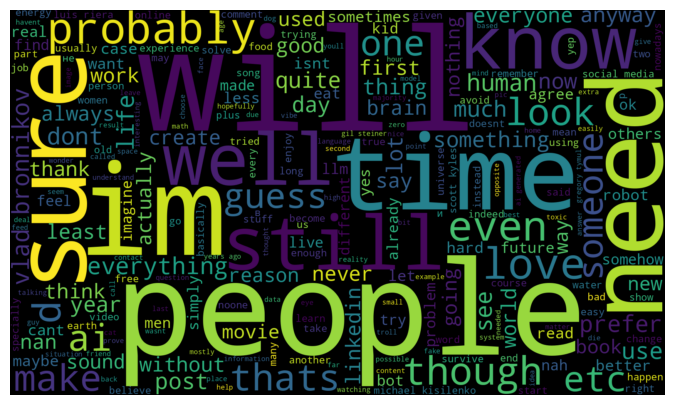

In [ ]:
#create most frequent names cloud

lst=[str(message).split() for message in df.Cleaned_Message]
flat_lst = [item for sublist in lst for item in sublist]

text = " ".join(flat_lst)
print ("There are {} names.".format(len(text.split())))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, width=1700, height=1000, max_words=250, background_color="black").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
from collections import Counter

word_counts = Counter(flat_lst)

# Get the top 200 most frequent words
top_200_words = word_counts.most_common(50)

# Print the top 200 words and their counts
for word, count in top_200_words:
    print(f"{word}: {count}")


the: 3178
to: 2924
i: 2230
and: 1834
it: 1668
a: 1563
of: 1550
is: 1482
you: 1306
in: 1256
for: 1102
not: 1037
are: 949
with: 872
be: 861
its: 848
but: 751
or: 680
so: 675
just: 655
will: 619
my: 614
like: 607
this: 576
can: 535
we: 525
im: 509
on: 508
that: 503
they: 494
as: 487
people: 471
me: 456
if: 444
all: 441
was: 423
too: 401
no: 386
at: 362
do: 358
some: 334
your: 334
have: 329
more: 321
an: 320
what: 307
about: 283
ai: 280
from: 280
only: 278


## MESSAGE LENGTH ANALYSIS

In [152]:
# Group by author, sum the 'Length' column, and sort in descending order
author_length_sum = df.groupby('Author')['Length'].sum().sort_values(ascending=False)

author_length_sum

author_length_summary = df.groupby('Author')['Length'].agg(['sum', 'max', 'min', 'mean', 'median', 'count']).sort_values(by='sum', ascending=False)
author_length_summary.head(20)

,sum,max,min,mean,median,count
Author,,,,,,
Julia G.,40144,746,0,102.147583,71.0,393
Andreas Horn,28209,686,5,143.923469,96.0,196
Vlad Bronnikov,26847,574,0,68.662404,48.0,391
Michael Kisilenko,23734,696,8,130.406593,90.5,182
Marcus Scholle,23193,537,0,88.862069,65.0,261
Ralph Aboujaoude Diaz,19564,914,0,104.620321,67.0,187
Marc Duckeck,16190,538,3,103.121019,77.0,157
Stephen Telford,14610,1020,4,98.716216,51.5,148
Ross Sullivan,11593,302,0,72.006211,61.0,161


## ANALYSIS BY QUARTERS FOR BOX PLOTS

In [153]:
# Create quartal labels
df['Quartal'] = pd.PeriodIndex(df['Date'], freq='Q').astype(str)

# Define the quartals you want to split by
quartals = ['2024Q1', '2024Q2', '2024Q3', '2024Q4', '2025Q1', '2025Q2']

# Split the DataFrame into a dictionary of DataFrames, one for each quartal
quartal_dfs = {}
for quartal in quartals:
  quartal_dfs[quartal] = df[df['Quartal'] == quartal]




In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post,Sentiment_Label_message,Sentiment_Score_message,Sentiment_Label_post,Sentiment_Score_post,Quartal
0,0,0,2025-04-21 17:05:32,https://www.linkedin.com/feed/update/urn%3Ali%...,Won't somebody please think of the sigma males.,45,0,Won't somebody please think of the sigma males.,Ralph Aboujaoude Diaz,"Honestly, I always considered myself as a ‚Äúb...",wont somebody please think of the sigma males,honestly i always considered myself as a äúbet...,POSITIVE,0.910821,POSITIVE,0.943981,2025Q2
1,1,1,2025-04-21 12:09:22,https://www.linkedin.com/feed/update/urn%3Ali%...,"Well, it's not just 'thank you' phrase. Imagin...",275,0,"Well, it's not just 'thank you' phrase. Imagin...",Ralph Aboujaoude Diaz,A rare picture of Sam Altman bravely facing th...,well its not just thank you phrase imagine bei...,a rare picture of sam altman bravely facing th...,NEGATIVE,0.957057,POSITIVE,0.903346,2025Q2
2,2,2,2025-04-21 11:46:10,https://www.linkedin.com/feed/update/urn%3Ali%...,Whose body? 🧐,10,1,Whose body? 🧐,Michael Kisilenko,The vibe of hype-driven development is killing...,whose body,the vibe of hypedriven development is killing ...,POSITIVE,0.957440,NEGATIVE,0.999374,2025Q2
3,3,3,2025-04-21 09:28:51,https://www.linkedin.com/feed/update/urn%3Ali%...,final prove you are AI.,22,0,final prove you are AI.,Ken Cheng,I reprimanded an employee for watching YouTube...,final prove you are ai,i reprimanded an employee for watching youtube...,POSITIVE,0.634744,NEGATIVE,0.865473,2025Q2
4,4,4,2025-04-21 07:05:18,https://www.linkedin.com/feed/update/urn%3Ali%...,Does machine have 👀? \n\nEvery move you'll mak...,59,2,Does machine have 👀? \n\nEvery move you'll mak...,Marc Duckeck,üóΩ History coming to life\n\nAI is revolutio...,does machine have every move youll make ill be...,üóω history coming to life ai is revolutionizi...,NEGATIVE,0.979554,POSITIVE,0.988661,2025Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5874,5874,5874,2024-04-05 05:36:50,https://www.linkedin.com/feed/update/urn%3Ali%...,"George, проблема ведь в том, что у психопата, ...",399,0,"George, проблема ведь в том, что у психопата, ...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,george проблема ведь в том что у психопата кот...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...,NEGATIVE,0.800548,ERROR,0.000000,2024Q2
5875,5875,5875,2024-04-04 11:50:47,https://www.linkedin.com/feed/update/urn%3Ali%...,"психопаты - идеальные хищники, использующие ми...",259,0,"психопаты - идеальные хищники, использующие ми...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,психопаты идеальные хищники использующие мимик...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...,NEGATIVE,0.717749,ERROR,0.000000,2024Q2
5876,5876,5876,2024-04-04 11:18:56,https://www.linkedin.com/feed/update/urn%3Ali%...,И обычно чем длиннее список тем меньше зарплата,47,0,И обычно чем длиннее список тем меньше зарплата,Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,и обычно чем длиннее список тем меньше зарплата,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...,NEGATIVE,0.715546,ERROR,0.000000,2024Q2
5877,5877,5877,2024-04-03 13:15:02,https://www.linkedin.com/feed/update/urn%3Ali%...,"Добавлю ещё, что эволюция не поощряет объектив...",407,0,"Добавлю ещё, что эволюция не поощряет объектив...",Mike Torchinsky,–ü—Ä–µ–¥–≤–∑—è—Ç–æ—Å—Ç—å ‚Äì –±–∏—á —Å–æ–≤—Ä–µ...,добавлю ещё что эволюция не поощряет объективн...,üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ω...,NEGATIVE,0.856077,ERROR,0.000000,2024Q2


## BOX PLOTS OF 15 TOP AUTHORS

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


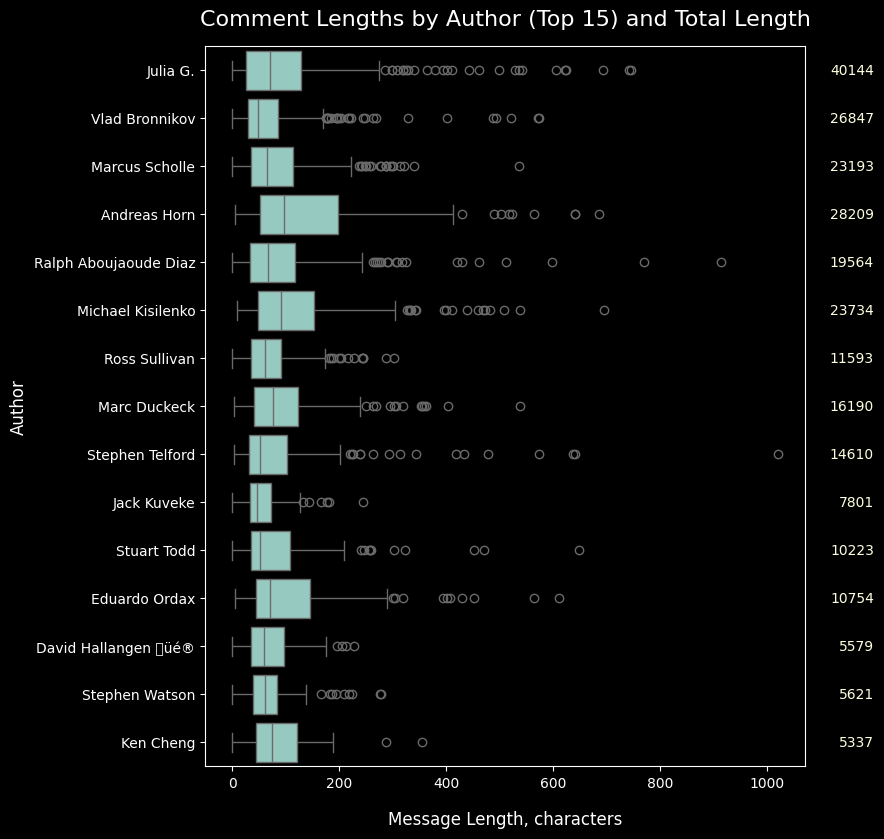

In [154]:
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(10, 12))  # Adjust figure size as needed
sns.boxplot(x='Length', y='Author', data=df[df['Author'].isin(top_15_authors.index)], order=top_15_authors.index)
plt.xlabel('Message Length, characters', fontsize=12, labelpad=15)
plt.ylabel('Author', fontsize=12)
plt.title(f'Comment Lengths by Author (Top {n}) and Total Length', fontsize=16,  pad=15) # pad adds space betwen title and plot

# Add total length annotations to the right of each boxplot
for author in top_15_authors.index:
    total_length = author_length_sum[author]
    plt.text(1200,  # Adjust x-position
             top_15_authors.index.get_loc(author),  # y-position
             f'{total_length:.0f}',
             ha='right',  # Horizontal alignment
             va='center',  # Vertical alignment
             fontsize=10,  # Adjust font size if needed
             color='lightyellow'  # Adjust color if needed
             )

plt.style.use('dark_background')
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # Adjust these values as needed

plt.show()


In [198]:
top_15_authors.values[-1]

np.int64(61)

## 6 BOX PLOTS BY QUARTERS

<ipython-input-15-8149985130e9>:27: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


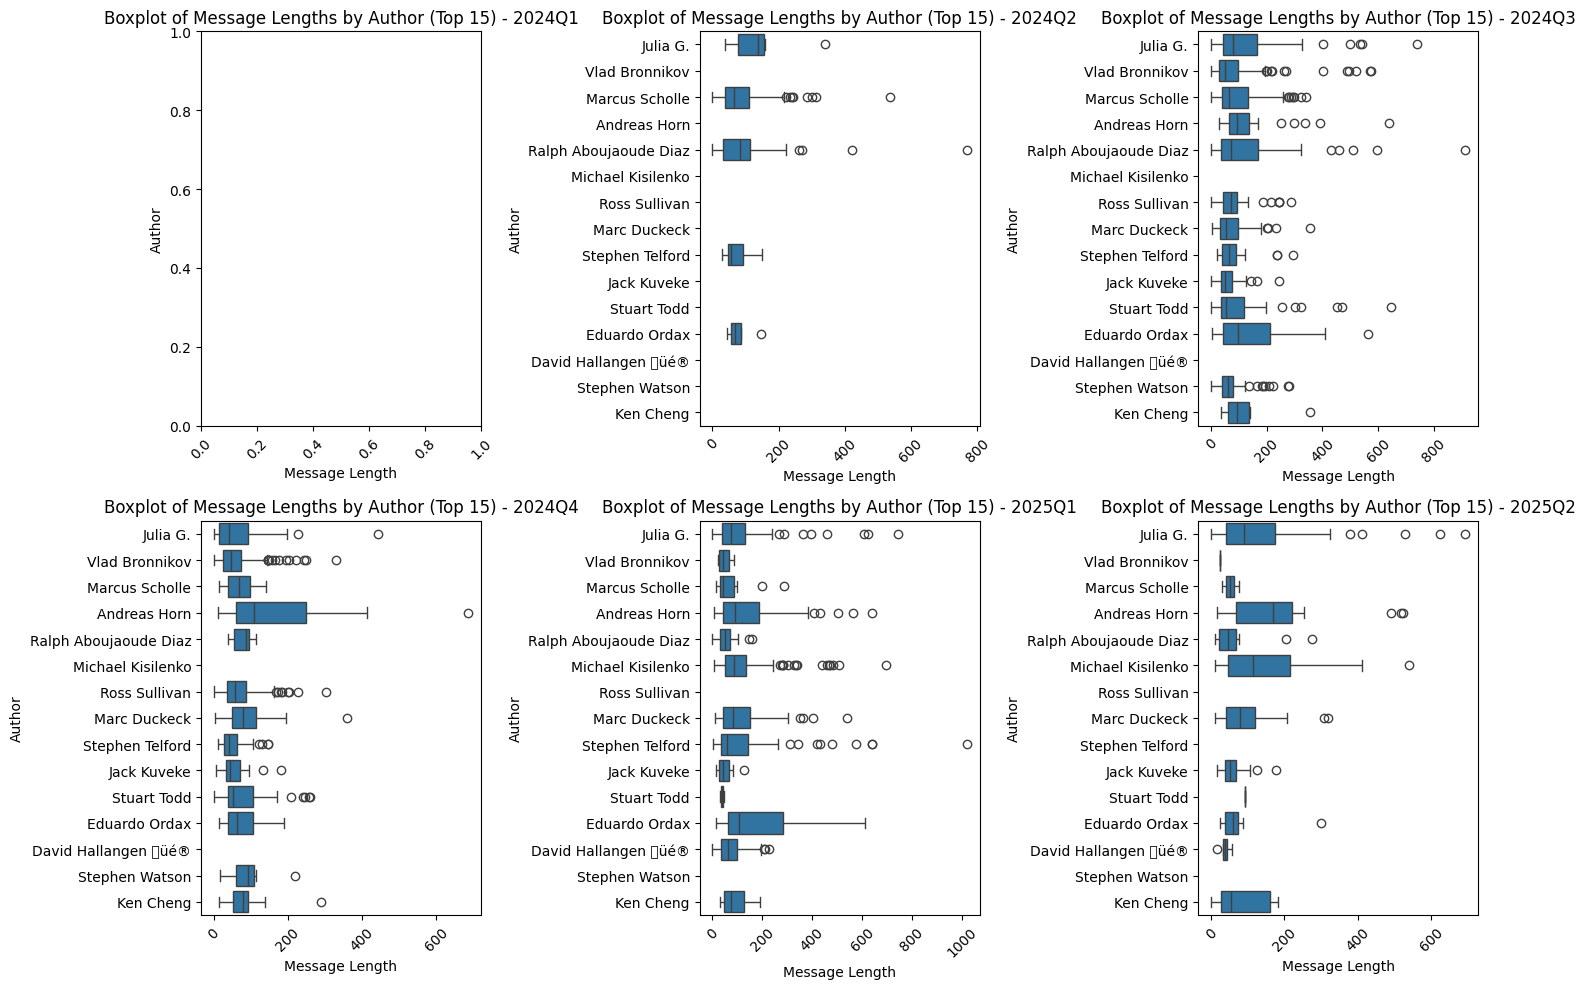

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 215 authors by the sum of their message lengths

# Define the quartals you want to plot
quartals = ['2024Q1', '2024Q2', '2024Q3', '2024Q4', '2025Q1', '2025Q2']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, quartal in enumerate(quartals):
    # Filter data for the current quartal and the top 20 authors
    data_quartal = df[(df['Quartal'] == quartal) & (df['Author'].isin(top_15_authors.index))]

    # Create boxplot on the current subplot
    sns.boxplot(x='Length', y='Author', data=data_quartal, order=top_15_authors.index, ax=axes[i])
    axes[i].set_xlabel('Message Length')
    axes[i].set_ylabel('Author')
    axes[i].set_title(f'Boxplot of Message Lengths by Author (Top 15) - {quartal}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## 2 BOXPLOTS BY YEAR

<ipython-input-16-ca0e691dbd2d>:29: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


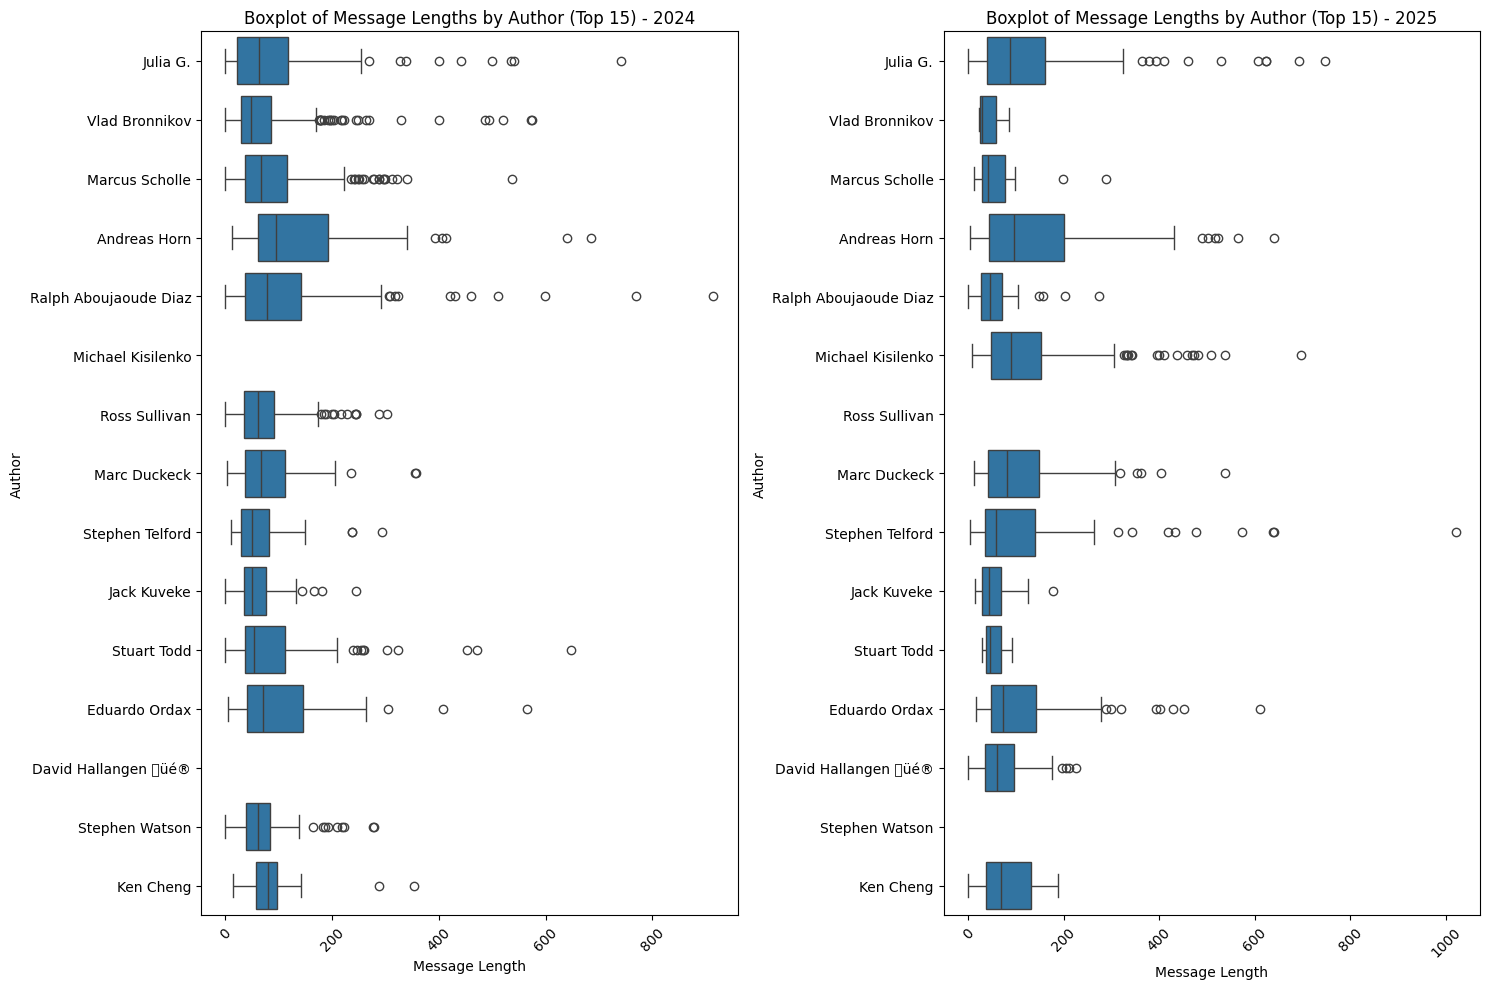

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 15 authors by the sum of their message lengths

# Define the year you want to plot
years = [2024, 2025]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, year in enumerate(years):
    # Filter data for the current quartal and the top 15 authors
    data_year= df[(df['Date'].dt.year == year) & (df['Author'].isin(top_15_authors.index))]

    # Create boxplot on the current subplot
    sns.boxplot(x='Length', y='Author', data=data_year, order=top_15_authors.index, ax=axes[i])
    axes[i].set_xlabel('Message Length')
    axes[i].set_ylabel('Author')
    axes[i].set_title(f'Boxplot of Message Lengths by Author (Top 15) - {year}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.style.use('dark_background')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

## BOX PLOTS BY AUTHORS

<ipython-input-17-7d4aa25fee6c>:20: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


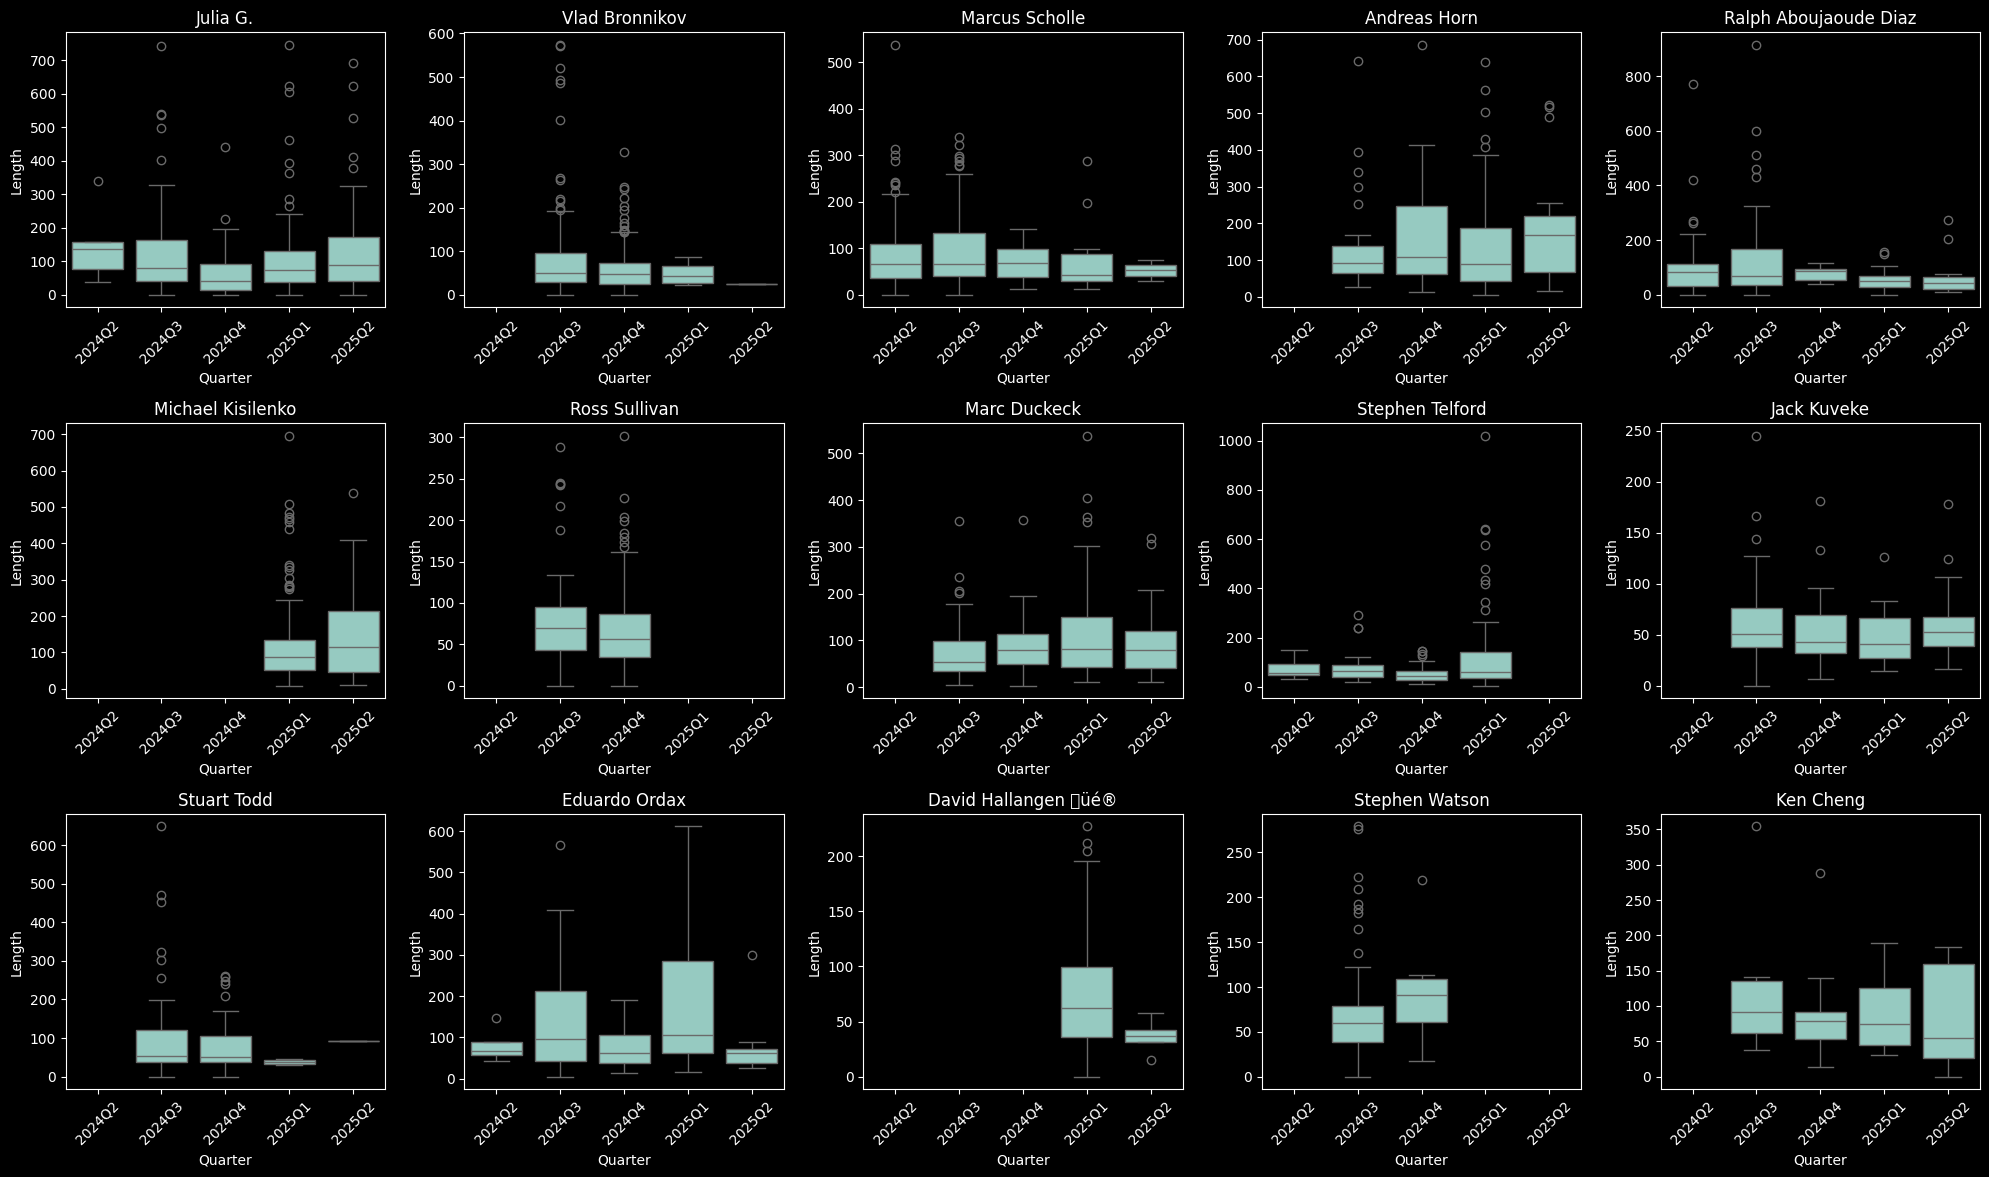

In [ ]:
# Convert 'Date' column to datetime objects if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Create time period categories (e.g., quarters)
df['Quarter'] = df['Date'].dt.to_period('Q')

# Create the box plots
plt.figure(figsize=(20, 15))  # Adjust figure size as needed

for i, author in enumerate(top_15_authors.index):
    plt.subplot(4, 5, i + 1)  # Create subplots in a 4x5 grid
    author_data = df[df['Author'] == author]
    sns.boxplot(x='Quarter', y='Length', data=author_data, order=df['Quarter'][::-1])
    plt.title(author)
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.tight_layout()

plt.style.use('dark_background')

plt.show()


## PIVOT TABLE MONTHLY TOTAL MESSAGE LENGTHS BY AUTHORS

In [ ]:

pivot_table = df.pivot_table(index=pd.Grouper(key='Date', freq='ME'),
                                     columns='Author',
                                     values='Length',
                                     aggfunc='sum',
                                     fill_value=0)

pivot_table.index = pd.to_datetime(pivot_table.index, format='%ME-%Y')

pivot_table

Author,.Alex Dunsdon,A-A-Ron McCoy üßôüèª‚ôÇÔ∏è,AI,AI Echo,AI Memes,Aaron Prather,Abhishek Thakur,Adam Jacobi MBA üá´üá∑üá©üá™üá®üá≠,Adam Karpiak,Adelle Fieldsend,...,ü¶î james hawkins,üåª Anna Miller,üåè Tr√© R.,üëª Joe Goulcher,üí°Nuno Reis,üî• Danny Shaket,üõ°Ô∏è David E.,üöó Karol üöÄ‚ö°Ô∏è,ü•É Greg Stellflue ü•É,𝙈𝙞𝙣𝙙 𝘽𝙚𝙣𝙙𝙞𝙣𝙜 𝙋𝙝𝙮𝙨𝙞𝙘𝙨
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-05-31,0,0,0,105,0,0,75,0,23,0,...,5,0,66,0,0,0,0,13,0,0
2024-06-30,0,0,0,179,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-07-31,0,0,0,16,0,114,0,0,0,0,...,0,0,0,0,0,0,105,0,0,0
2024-08-31,0,0,49,0,0,0,0,0,0,0,...,0,0,0,0,910,0,0,0,0,0
2024-09-30,0,0,0,0,0,0,0,37,0,0,...,0,69,0,0,0,0,0,0,0,0
2024-10-31,65,0,0,0,0,0,0,922,0,0,...,0,0,0,0,0,336,0,0,0,0
2024-11-30,0,0,0,0,0,0,0,54,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-12-31,0,254,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
top_15_authors

,Message
Author,
Julia G.,393
Vlad Bronnikov,391
Marcus Scholle,260
Andreas Horn,196
Ralph Aboujaoude Diaz,186
Michael Kisilenko,182
Ross Sullivan,161
Marc Duckeck,157
Stephen Telford,148


## PIVOT TABLE WITH THE TOP 15 AUTHORS ONLY FOR THE HEATMAP

In [ ]:
pivot_table = df[df['Author'].isin(top_15_authors.index)].pivot_table(index=pd.Grouper(key='Date', freq='ME'),
                                     columns='Author',
                                     values='Length',
                                     aggfunc='sum',
                                     fill_value=0)

pivot_table.index = pd.to_datetime(pivot_table.index, format='%ME-%Y')

pivot_table


Author,Andreas Horn,David Hallangen üé®,Eduardo Ordax,Jack Kuveke,Julia G.,Ken Cheng,Marc Duckeck,Marcus Scholle,Michael Kisilenko,Ralph Aboujaoude Diaz,Ross Sullivan,Stephen Telford,Stephen Watson,Stuart Todd,Vlad Bronnikov
Date,,,,,,,,,,,,,,,
2024-04-30,0,0,0,0,0,0,0,0,0,72,0,0,0,0,0
2024-05-31,0,0,271,0,0,0,0,7646,0,246,0,0,0,0,0
2024-06-30,0,0,131,0,1096,0,0,3561,0,4575,0,439,0,0,0
2024-07-31,221,0,454,1325,209,0,0,5784,0,9551,70,327,613,0,0
2024-08-31,3045,0,854,2776,4554,0,2183,2070,0,1779,591,1426,2197,1049,4636
2024-09-30,1287,0,2046,922,3995,778,381,2166,0,109,3676,672,2227,5536,10855
2024-10-31,2413,0,510,399,566,583,665,61,0,118,1609,1139,226,3470,480
2024-11-30,1704,0,366,436,4845,508,121,535,0,360,4776,496,0,0,6851
2024-12-31,1167,0,351,80,2181,986,1379,380,0,149,871,151,358,0,3803


## HEATMAP WITH THE TOP 15 AUTHORS MONTHLY MESSAGE LENGTH

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


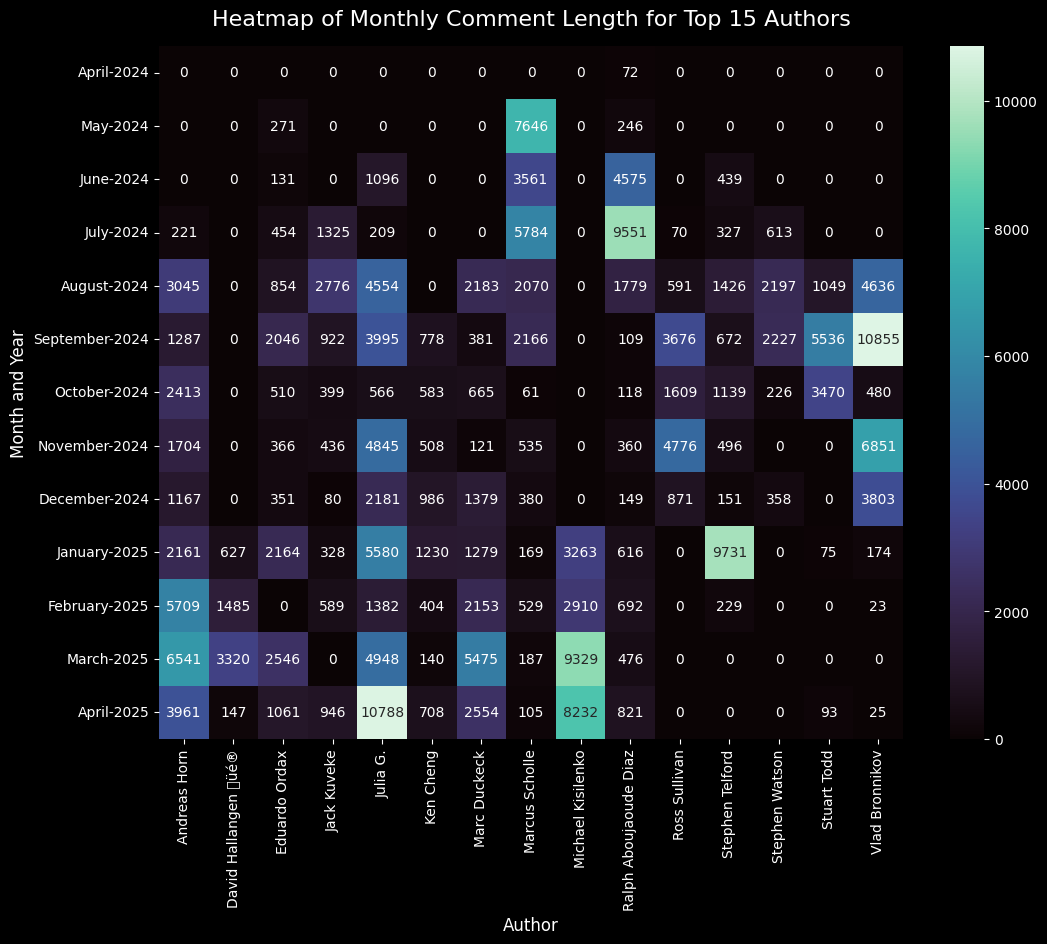

In [156]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

if not isinstance(pivot_table.index, pd.Index):
    pivot_table.index = pd.Index(pivot_table.index)

plt.figure(figsize=(12, 9))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="mako", yticklabels=pivot_table.index.strftime('%B-%Y'))
plt.title(f'Heatmap of Monthly Comment Length for Top {pivot_table.shape[1]} Authors', fontsize=16, pad=15)  # Threshold: comments > {top_15_authors.values[-1]-1}', fontsize=16,  pad=15)
plt.xlabel('Author', fontsize=12)
plt.ylabel('Month and Year', fontsize=12) # Changed the label

plt.style.use('dark_background')

plt.xticks(rotation=90)#, ha='right') # Rotated x-axis labels for better readability

#plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1) # Adjust these values as needed

#plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


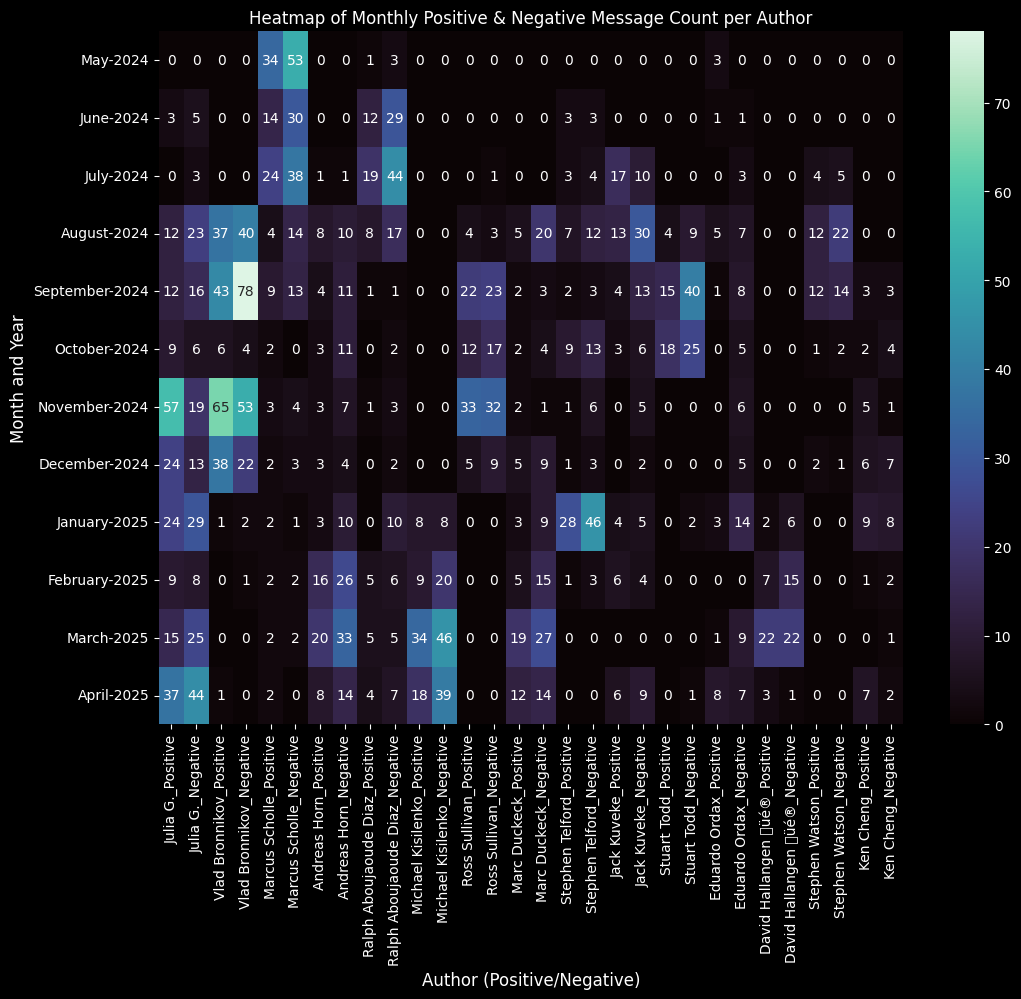

In [ ]:
# Create a new pivot table for positive and negative messages
positive_pivot = df[
    (df["Author"].isin(top_15_authors.index)) & (df["Sentiment_Label_message"] == "POSITIVE")
].pivot_table(
    index=pd.Grouper(key="Date", freq="ME"),
    columns="Author",
    values="Message",
    aggfunc="count",
    fill_value=0,
)

negative_pivot = df[
    (df["Author"].isin(top_15_authors.index)) & (df["Sentiment_Label_message"] == "NEGATIVE")
].pivot_table(
    index=pd.Grouper(key="Date", freq="ME"),
    columns="Author",
    values="Message",
    aggfunc="count",
    fill_value=0,
)


# Combine positive and negative counts into a single DataFrame
sentiment_pivot = pd.DataFrame(index=positive_pivot.index)

for author in top_15_authors.index:
    if author in positive_pivot.columns:
        sentiment_pivot[author + "_Positive"] = positive_pivot[author]
    else:
        sentiment_pivot[author + "_Positive"] = 0

    if author in negative_pivot.columns:
        sentiment_pivot[author + "_Negative"] = negative_pivot[author]
    else:
        sentiment_pivot[author + "_Negative"] = 0

#Convert index to DateTimeIndex
sentiment_pivot.index = pd.to_datetime(sentiment_pivot.index)

#Plot the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(sentiment_pivot, annot=True, fmt="d", cmap="mako", yticklabels=sentiment_pivot.index.strftime('%B-%Y'))
plt.title(f"Heatmap of Monthly Positive & Negative Message Count per Author")
plt.xlabel("Author (Positive/Negative)", fontsize=12)
plt.ylabel("Month and Year", fontsize=12)
plt.xticks(rotation=90)
plt.show()


## COMMENTS AND POSTS SENTIMENT TABLE

In [ ]:
df_unique_links = df.drop_duplicates(subset='Link', keep='first') #only to show unique posts to calculate their negativity percentage

sentiment_counts = df.groupby(['Author']).agg({'Sentiment_Label_message': lambda x: x.value_counts().to_dict()})

# Sort by total sentiment counts in descending order
sentiment_counts['Number_of_Comments'] = sentiment_counts['Sentiment_Label_message'].apply(lambda x: sum(x.values()))
sentiment_counts['Total_Length'] = df.groupby('Author')['Length'].sum()
sentiment_counts['Average_Length'] = round(sentiment_counts['Total_Length']/sentiment_counts['Number_of_Comments'],1)

sentiment_counts['Negative_Posts'] = df_unique_links[df_unique_links['Sentiment_Label_post']=='NEGATIVE'].groupby('Author')['Sentiment_Label_post'].count()
sentiment_counts['Negative_Posts'] = pd.to_numeric(sentiment_counts['Negative_Posts'], errors='coerce').fillna(0).astype(int)

sentiment_counts['Positive_Posts'] = df_unique_links[df_unique_links['Sentiment_Label_post']=='POSITIVE'].groupby('Author')['Sentiment_Label_post'].count()
sentiment_counts['Positive_Posts'] = pd.to_numeric(sentiment_counts['Positive_Posts'], errors='coerce').fillna(0).astype(int)

def calculate_negative_ratio(sentiment_dict):
    return round(sentiment_dict.get('NEGATIVE', 0) / sum(sentiment_dict.values()) if sum(sentiment_dict.values()) > 0 else 0, 2)

sentiment_counts['Negative_Ratio_Comment'] = sentiment_counts['Sentiment_Label_message'].apply(calculate_negative_ratio)
sentiment_counts['Negative_Ratio_Post'] = round(sentiment_counts['Negative_Posts']/(sentiment_counts['Negative_Posts']+sentiment_counts['Positive_Posts']),2)

sentiment_counts = sentiment_counts.sort_values('Number_of_Comments', ascending=False)
# Display the result

sentiment_counts.head(15)


,Sentiment_Label_message,Number_of_Comments,Total_Length,Average_Length,Negative_Posts,Positive_Posts,Negative_Ratio_Comment,Negative_Ratio_Post
Author,,,,,,,,
Julia G.,"{'POSITIVE': 202, 'NEGATIVE': 191}",393,40144,102.1,67,27,0.49,0.71
Vlad Bronnikov,"{'NEGATIVE': 200, 'POSITIVE': 191}",391,26847,68.7,54,26,0.51,0.68
Marcus Scholle,"{'NEGATIVE': 160, 'POSITIVE': 101}",261,23193,88.9,125,14,0.61,0.90
Andreas Horn,"{'NEGATIVE': 127, 'POSITIVE': 69}",196,28209,143.9,54,39,0.65,0.58
Ralph Aboujaoude Diaz,"{'NEGATIVE': 130, 'POSITIVE': 57}",187,19564,104.6,85,24,0.70,0.78
Michael Kisilenko,"{'NEGATIVE': 113, 'POSITIVE': 69}",182,23734,130.4,60,16,0.62,0.79
Ross Sullivan,"{'NEGATIVE': 85, 'POSITIVE': 76}",161,11593,72.0,54,32,0.53,0.63
Marc Duckeck,"{'NEGATIVE': 102, 'POSITIVE': 55}",157,16190,103.1,30,39,0.65,0.43
Stephen Telford,"{'NEGATIVE': 93, 'POSITIVE': 55}",148,14610,98.7,64,31,0.63,0.67


## DAILY POSITIVE/NEGATIVE COMMENTS COUNT

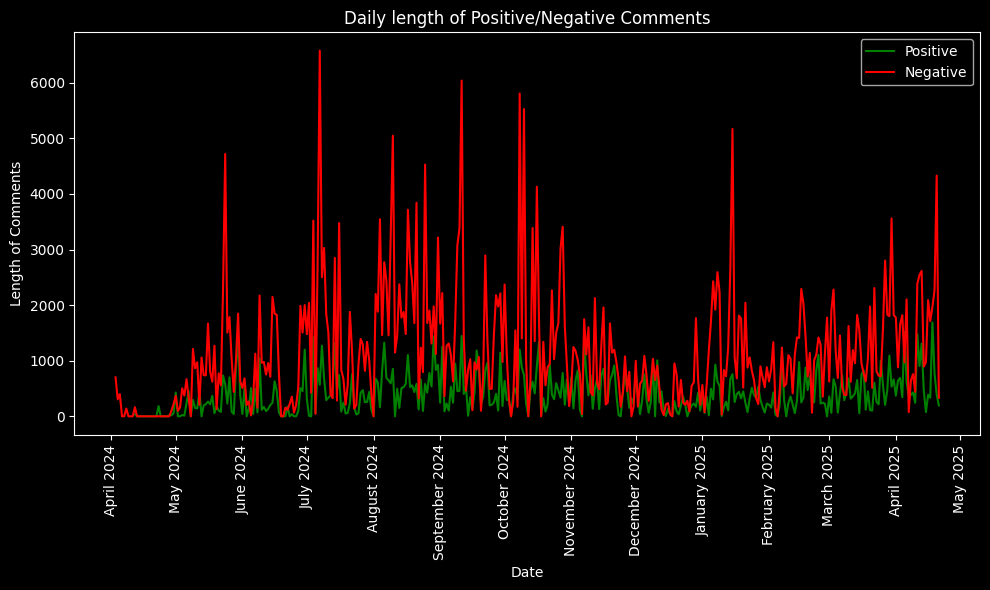

In [ ]:
daily_positive_message_count = df[df['Sentiment_Label_message']=='POSITIVE'].groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()
daily_negative_message_count = df[df['Sentiment_Label_message']=='NEGATIVE'].groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(daily_positive_message_count.index, daily_positive_message_count.values, label='Positive', color='green')  # Negate the y-values
plt.plot(daily_negative_message_count.index, daily_negative_message_count.values, label='Negative', color='red')  # Negate the y-values
#plt.plot(daily_message_count.index, daily_message_count.values, color='blue')


plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
plt.style.use('dark_background')

plt.xticks(rotation=90)

plt.xlabel('Date')
plt.ylabel('Length of Comments') # Change y-axis label
plt.title('Daily length of Positive/Negative Comments') # Change title
plt.legend()
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


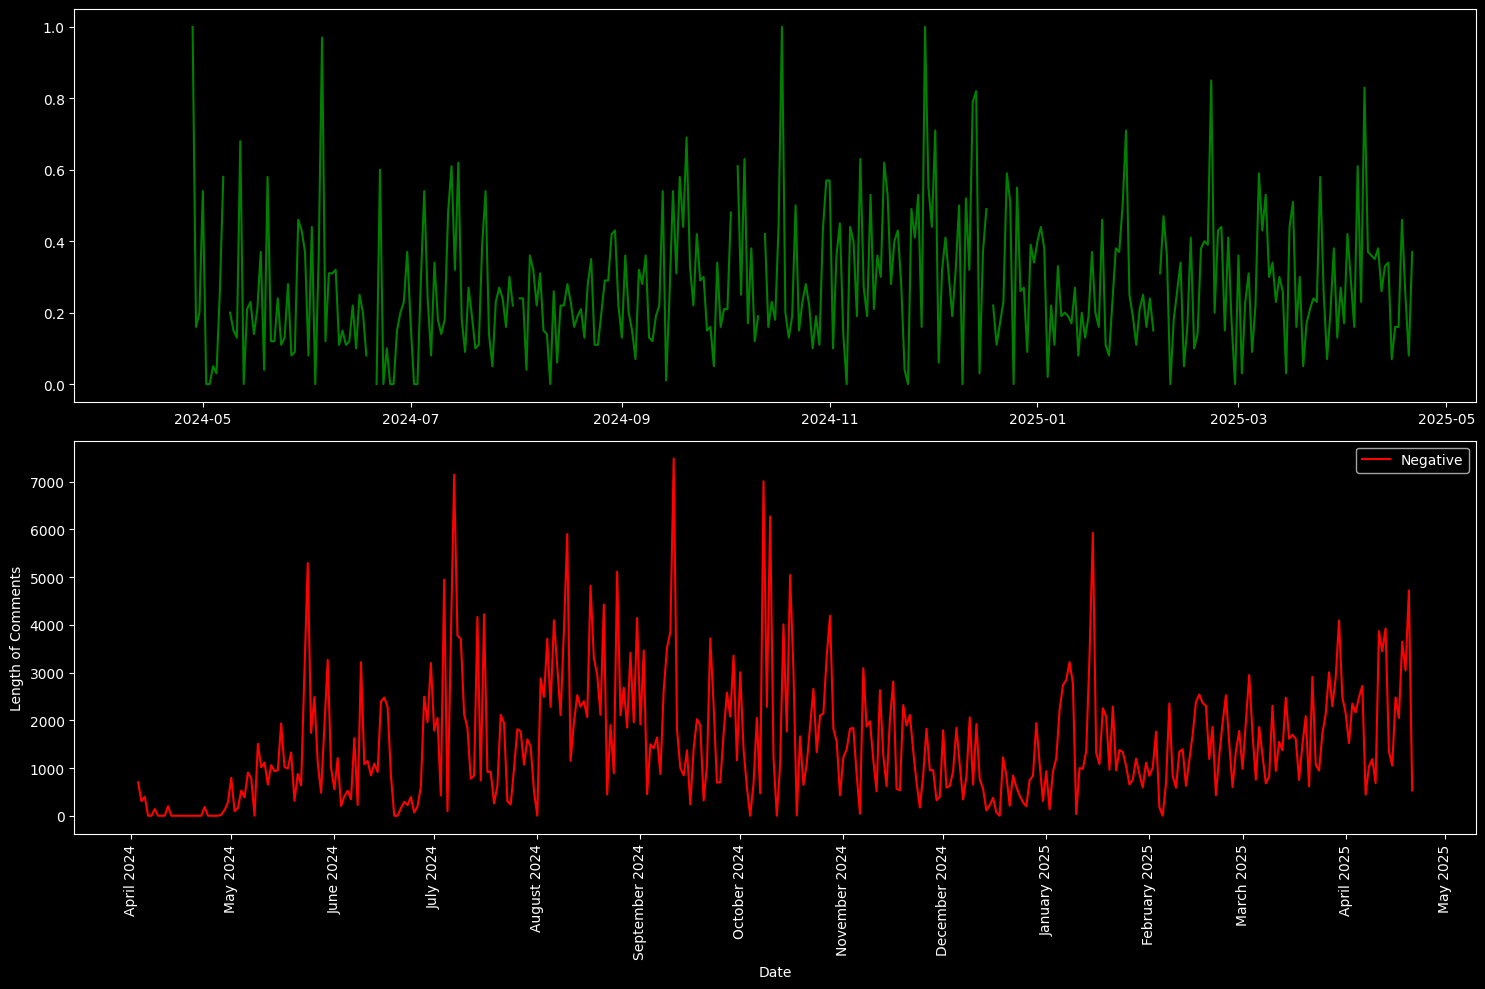

In [ ]:
daily_positive_message_length = df[df['Sentiment_Label_message']=='POSITIVE'].groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()
daily_negative_message_length = df[df['Sentiment_Label_message']=='NEGATIVE'].groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()

daily_positivity=daily_positive_message_length.div(daily_positive_message_length + daily_negative_message_length, fill_value=0).round(2)

daily_length=df.groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(15, 10)) # 2 rows one column

axes[0].plot(daily_positivity.index, daily_positivity.values, label='Positive', color='green')
axes[1].plot(daily_length.index, daily_length.values, label='Negative', color='red')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
plt.style.use('dark_background')

plt.xticks(rotation=90)

plt.xlabel('Date')
plt.ylabel('Length of Comments') # Change y-axis label
#plt.title('Daily length of Positive/Negative Comments') # Change title
plt.legend()
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sentiment scores grouped

In [ ]:
# Create bins for Sentiment_Score_message
bins = [0, 0.6, 0.8, 1.0]
labels_neg = ['Weak sentiment', 'Moderate sentiment', 'Strong sentiment']
labels_pos = ['Weak sentiment', 'Moderate sentiment', 'Strong sentiment']
df['Sentiment_Score_Interval'] = pd.cut(df['Sentiment_Score_message'], bins=bins, labels=labels_neg, right=False)

# Calculate sum of 'Length' for negative sentiment and different score intervals
result_neg = df[df['Sentiment_Label_message'] == 'NEGATIVE'].groupby('Sentiment_Score_Interval').agg({'Length': 'sum', 'Message': 'count'}

                                                                                                     ).rename(columns={'Length': 'Total_Length', 'Message': 'Message_Count'})
result_pos = df[df['Sentiment_Label_message'] == 'POSITIVE'].groupby('Sentiment_Score_Interval').agg({'Length': 'sum', 'Message': 'count'}
                                                                                                 ).rename(columns={'Length': 'Total_Length', 'Message': 'Message_Count'})


merged_sentiment = pd.merge(result_neg, result_pos, on='Sentiment_Score_Interval', suffixes=('_negative', '_positive'))
merged_sentiment


<ipython-input-71-195739d0ec51>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_neg = df[df['Sentiment_Label_message'] == 'NEGATIVE'].groupby('Sentiment_Score_Interval').agg({'Length': 'sum', 'Message': 'count'}
<ipython-input-71-195739d0ec51>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_pos = df[df['Sentiment_Label_message'] == 'POSITIVE'].groupby('Sentiment_Score_Interval').agg({'Length': 'sum', 'Message': 'count'}


,Total_Length_negative,Message_Count_negative,Total_Length_positive,Message_Count_positive
Sentiment_Score_Interval,,,,
Weak sentiment,8245,79,5769,75
Moderate sentiment,22776,209,13317,280
Strong sentiment,413644,3403,129657,1825


## Sentiment heatmaps

In [ ]:
# problem with the first week that should be 52th actually
pivot_table_neg = df[
    (df["Author"].isin(top_15_authors.index)) & (df["Sentiment_Label_message"] == "NEGATIVE") & (df['Date'].dt.year==2024)
].pivot_table(index=df['Date'].dt.weekday,
                                     columns=df['Date'].dt.isocalendar().week,
                                     values='Message',
                                     aggfunc='count',
                                     fill_value=0)
pivot_table_neg


week,1,18,19,20,21,22,23,24,25,26,...,43,44,45,46,47,48,49,50,51,52
Date,,,,,,,,,,,,,,,,,,,,,
0,6,1,4,1,2,4,2,4,3,3,...,1,3,3,5,2,4,3,3,1,1
1,2,0,2,2,5,0,3,2,1,2,...,3,6,2,10,7,6,4,0,0,0
2,0,1,0,1,2,0,1,1,0,2,...,2,4,1,2,8,6,4,5,0,3
3,0,0,2,1,2,1,2,3,0,1,...,2,1,6,5,3,6,6,1,3,0
4,0,0,4,0,3,1,0,3,0,5,...,6,2,12,9,5,0,3,2,4,0
5,0,1,0,2,3,1,2,5,0,4,...,6,1,9,5,6,0,2,1,2,2
6,0,3,1,3,5,0,9,4,1,4,...,3,6,5,1,0,10,4,1,0,7


In [ ]:
pivot_table_pos = df[
    (df["Author"].isin(top_15_authors.index)) & (df["Sentiment_Label_message"] == "POSITIVE") & (df['Date'].dt.year==2024)
].pivot_table(index=df['Date'].dt.weekday,
                                     columns=df['Date'].dt.isocalendar().week,
                                     values='Message',
                                     aggfunc='count',
                                     fill_value=0)

In [ ]:
pivot_table_positivity = pivot_table_pos / (pivot_table_pos + pivot_table_neg)

pivot_table_positivity = pivot_table_positivity.fillna(0)

pivot_table_positivity

week,1,18,19,20,21,22,23,24,25,26,...,43,44,45,46,47,48,49,50,51,52
Date,,,,,,,,,,,,,,,,,,,,,
0,0.333333,0.00,0.428571,0.000000,0.333333,0.000000,0.000000,0.200,0.4,0.250000,...,0.000000,0.25,0.500000,0.444444,0.666667,0.733333,0.571429,0.625000,0.666667,0.666667
1,0.500000,0.00,0.666667,0.333333,0.166667,0.000000,0.250000,0.000,0.0,0.000000,...,0.000000,0.25,0.000000,0.375000,0.588235,0.666667,0.333333,0.000000,0.000000,1.000000
2,0.000000,0.75,0.000000,0.750000,0.333333,0.000000,0.500000,0.000,0.0,0.000000,...,0.000000,0.20,0.000000,0.800000,0.600000,0.333333,0.636364,0.375000,0.000000,0.000000
3,0.000000,0.00,0.600000,0.666667,0.333333,0.666667,0.000000,0.250,0.0,0.500000,...,0.500000,0.50,0.684211,0.500000,0.700000,0.333333,0.333333,0.500000,0.571429,0.000000
4,0.000000,0.00,0.000000,1.000000,0.000000,0.666667,0.000000,0.250,0.0,0.444444,...,0.250000,0.00,0.368421,0.357143,0.642857,1.000000,0.750000,0.500000,0.333333,1.000000
5,0.000000,0.00,0.000000,0.600000,0.250000,0.000000,0.333333,0.375,1.0,0.555556,...,0.142857,0.00,0.437500,0.545455,0.250000,0.000000,0.500000,0.000000,0.333333,0.000000
6,0.000000,0.00,0.800000,0.000000,0.166667,1.000000,0.307692,0.200,0.0,0.200000,...,0.571429,0.50,0.687500,0.888889,1.000000,0.677419,0.333333,0.666667,1.000000,0.000000


<Axes: xlabel='week', ylabel='Date'>

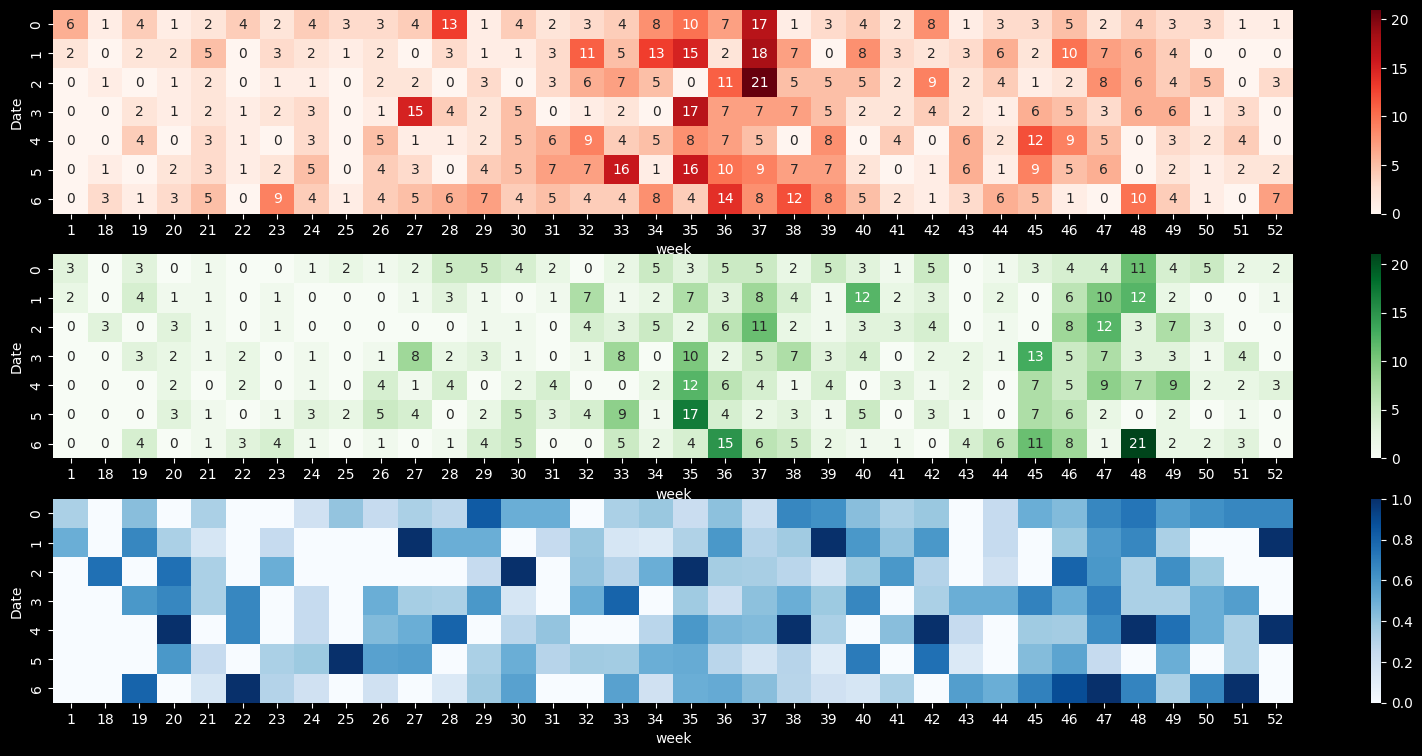

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pivot_table' is your DataFrame with dayofweek as index and month names as columns.
fig, axes = plt.subplots(3, 1, figsize=(20, 9))  # 2 rows, 3 columns
#axes = axes.flatten()

#plt.figure(figsize=(20, 2))

sns.heatmap(pivot_table_neg, annot=True, fmt="d", cmap="Reds", ax=axes[0])
sns.heatmap(pivot_table_pos, annot=True, fmt="d", cmap='Greens', ax=axes[1])
sns.heatmap(pivot_table_positivity,  cmap="Blues", ax=axes[2])

#plt.title('Heatmap of Negative Comments in 2024')
#plt.xlabel('Weeks')
#plt.ylabel('Day of Week')
#plt.xticks(rotation=45)
#plt.show()


In [ ]:
df_top_15=df[df['Author'].isin(top_15_authors.index)]

In [ ]:
# Example of some short ironic/sarcastic comments that were interpreted as positive by sentiment analysis. Context matters.

df_top_15[(df_top_15['Sentiment_Label_message']=='POSITIVE')&
          (df_top_15['Sentiment_Label_post']=='NEGATIVE')&
          (df_top_15['Sentiment_Score_message']>=0.999)&
          (df_top_15['Sentiment_Score_post']>=0.999)&
          (df_top_15['Length']<=50)].sort_values(by='Sentiment_Score_message', ascending=False)

,Unnamed: 0.1,Unnamed: 0,Date,Link,Message,Length,emoji_number,Message_no_link,Author,Post,Cleaned_Message,Cleaned_Post,Sentiment_Label_message,Sentiment_Score_message,Sentiment_Label_post,Sentiment_Score_post,Quartal,Quarter
3266,3266,3266,2024-09-26 06:09:10,https://www.linkedin.com/feed/update/urn%3Ali%...,'Good vibe' for the rest of the day. Thanks. 😂,40,1,'Good vibe' for the rest of the day. Thanks. 😂,Marc Duckeck,🎶 I'm starting with the man in the mirror\nI'm...,good vibe for the rest of the day thanks,im starting with the man in the mirror im aski...,POSITIVE,0.999850,NEGATIVE,0.999058,2024Q3,2024Q3
2829,2829,2829,2024-10-19 09:51:29,https://www.linkedin.com/feed/update/urn%3Ali%...,Proud to be half Lithuanian. :D,29,0,Proud to be half Lithuanian. :D,Stephen Telford,"Evaldas Rimasauskas, a man from Lithuania, sca...",proud to be half lithuanian d,evaldas rimasauskas a man from lithuania scamm...,POSITIVE,0.999842,NEGATIVE,0.999336,2024Q4,2024Q4
94,94,94,2025-04-18 13:00:56,https://www.linkedin.com/feed/update/urn%3Ali%...,Good robot!,10,0,Good robot!,Michael Kisilenko,The vibe of hype-driven development is killing...,good robot,the vibe of hypedriven development is killing ...,POSITIVE,0.999842,NEGATIVE,0.999374,2025Q2,2025Q2
3108,3108,3108,2024-10-05 16:22:51,https://www.linkedin.com/feed/update/urn%3Ali%...,Well done. 👍,9,1,Well done. 👍,Jack Kuveke,Here's how to succeed in your 20s: \n\nStep 1:...,well done,heres how to succeed in your 20s step 1 steal ...,POSITIVE,0.999838,NEGATIVE,0.999134,2024Q4,2024Q4
783,783,783,2025-03-10 21:02:50,https://www.linkedin.com/feed/update/urn%3Ali%...,"Let's just agree, it's all magic. ✨",29,1,"Let's just agree, it's all magic. ✨",Michael Kisilenko,"Traditional developer: ""I need 4 hours researc...",lets just agree its all magic,traditional developer i need 4 hours researchi...,POSITIVE,0.999824,NEGATIVE,0.999342,2025Q1,2025Q1
1460,1460,1460,2025-01-21 15:32:41,https://www.linkedin.com/feed/update/urn%3Ali%...,Just a regular nice guy.,23,0,Just a regular nice guy.,Stephen Telford,Weakest social engineering attempt ever...,just a regular nice guy,weakest social engineering attempt ever,POSITIVE,0.999707,NEGATIVE,0.999759,2025Q1,2025Q1
4534,4534,4534,2024-08-06 19:41:28,https://www.linkedin.com/feed/update/urn%3Ali%...,"Wes Lorenzini words of a wise person, indeed.",43,0,"Wes Lorenzini words of a wise person, indeed.",Jack Kuveke,This morning I was conducting a final round in...,wes lorenzini words of a wise person indeed,this morning i was conducting a final round in...,POSITIVE,0.999239,NEGATIVE,0.999311,2024Q3,2024Q3
692,692,692,2025-03-17 07:19:59,https://www.linkedin.com/feed/update/urn%3Ali%...,Marc Duckeck sure,17,0,Marc Duckeck sure,Marc Duckeck,üí∞ Make money while you sleep\n\nDid you kno...,marc duckeck sure,üí make money while you sleep did you know tha...,POSITIVE,0.999175,NEGATIVE,0.999658,2025Q1,2025Q1


## FIRST&LAST MESSAGES TO TOP 15 AUTHORS

In [ ]:
import pandas as pd

# Create an empty list to store the data for the table
table_data = []
table_data1= []

# Iterate through the top 15 authors
for author in top_15_authors.index:
    try:
        # Get the first and last messages and dates for the current author
        first_message = df[df['Author'] == author]['Message_no_link'].iloc[-1]
        last_message = df[df['Author'] == author]['Message_no_link'].iloc[0]
        first_date = df[df['Author'] == author]['Date'].iloc[-1]
        last_date = df[df['Author'] == author]['Date'].iloc[0]
        first_sentiment = df[df['Author'] == author]['Sentiment_Label_message'].iloc[-1]
        last_sentiment = df[df['Author'] == author]['Sentiment_Label_message'].iloc[0]

        # Append the data to the list
        table_data.append({'Author': author, 'First_comment': first_message, 'Date': first_date, 'Sentiment': first_sentiment})
        table_data1.append({'Author': author, 'Last_comment': last_message, 'Date': last_date, 'Sentiment': last_sentiment})
    except IndexError:
        print(f"No messages found for author: {author}")

# Create a DataFrame from the table data
table_df = pd.DataFrame(table_data)
table_df1 = pd.DataFrame(table_data1)

# Display the table
table_df



,Author,First_comment,Date,Sentiment
0,Julia G.,It's not my Viz. Just found it and shared here...,2024-06-14 19:54:46,NEGATIVE
1,Vlad Bronnikov,"Not just a selfie but with the food. So, all I...",2024-08-10 07:58:54,NEGATIVE
2,Marcus Scholle,This lioness has more IQ than humans. Idiocracy.,2024-05-01 05:59:18,POSITIVE
3,Andreas Horn,Wear VR glasses and you will never be disappoi...,2024-07-27 09:21:47,NEGATIVE
4,Ralph Aboujaoude Diaz,Just a programmer on the spectrum. :) sometime...,2024-04-29 07:31:50,NEGATIVE
5,Michael Kisilenko,"Aww, and Hannibal Lecter enjoying the raw meat...",2025-01-12 12:07:18,POSITIVE
6,Ross Sullivan,"Opinions change gradually with the age, almost...",2024-07-28 10:23:04,NEGATIVE
7,Marc Duckeck,"Yep, people behave differently in different si...",2024-08-16 07:51:08,NEGATIVE
8,Stephen Telford,The only solution: Stanley food jar and 🎒 that...,2024-06-28 14:07:51,POSITIVE
9,Jack Kuveke,"Hey, you will get old someday too, hopefully w...",2024-07-01 19:03:46,POSITIVE


In [ ]:
# Merge the two dataframes
merged_df = pd.merge(table_df, table_df1, on='Author', suffixes=('_first', '_last'))
merged_df


,Author,First_comment,Date_first,Sentiment_first,Last_comment,Date_last,Sentiment_last
0,Julia G.,It's not my Viz. Just found it and shared here...,2024-06-14 19:54:46,NEGATIVE,"No worries, you are not the first person here ...",2025-04-20 14:47:44,NEGATIVE
1,Vlad Bronnikov,"Not just a selfie but with the food. So, all I...",2024-08-10 07:58:54,NEGATIVE,'like any visionary dealer'..,2025-04-08 11:08:34,POSITIVE
2,Marcus Scholle,This lioness has more IQ than humans. Idiocracy.,2024-05-01 05:59:18,POSITIVE,He thinks? It's a bold statement.,2025-04-05 08:28:43,POSITIVE
3,Andreas Horn,Wear VR glasses and you will never be disappoi...,2024-07-27 09:21:47,NEGATIVE,Will it create valuable output or an illusion ...,2025-04-14 10:04:25,NEGATIVE
4,Ralph Aboujaoude Diaz,Just a programmer on the spectrum. :) sometime...,2024-04-29 07:31:50,NEGATIVE,Won't somebody please think of the sigma males.,2025-04-21 17:05:32,POSITIVE
5,Michael Kisilenko,"Aww, and Hannibal Lecter enjoying the raw meat...",2025-01-12 12:07:18,POSITIVE,Whose body? 🧐,2025-04-21 11:46:10,POSITIVE
6,Ross Sullivan,"Opinions change gradually with the age, almost...",2024-07-28 10:23:04,NEGATIVE,"Unfortunately I joined this place too late, th...",2024-12-15 12:36:32,NEGATIVE
7,Marc Duckeck,"Yep, people behave differently in different si...",2024-08-16 07:51:08,NEGATIVE,Does machine have 👀? \n\nEvery move you'll mak...,2025-04-21 07:05:18,NEGATIVE
8,Stephen Telford,The only solution: Stanley food jar and 🎒 that...,2024-06-28 14:07:51,POSITIVE,the same as 'dear'.,2025-02-03 12:19:38,POSITIVE
9,Jack Kuveke,"Hey, you will get old someday too, hopefully w...",2024-07-01 19:03:46,POSITIVE,Does not compute?,2025-04-18 21:32:50,NEGATIVE


# NLP that failed so far. Skip it now.

In [ ]:
# prompt: analyze Cleaned_message with classifier = pipeline("text-classification")

# Assuming df and the 'Cleaned_Message' column are already defined as in your code

# Load the sentiment analysis pipeline (if not already loaded)
classifier = pipeline("text-classification")

# Function to analyze sentiment with progress bar (if not already defined)
def analyze_sentiment_with_progress(messages):
    sentiments = []
    for message in tqdm(messages, desc="Analyzing sentiment"):
      try:
        sentiments.append(classifier(message)[0])
      except Exception as e:
        print(f"Error analyzing: {message}. Error:{e}")
        sentiments.append({'label':'ERROR', 'score':0})
    return sentiments

# Analyze sentiment for 'Cleaned_Message' column
sentiment_results = analyze_sentiment_with_progress(df['Cleaned_Message'].astype(str))

# Create new columns for sentiment label and score
df[['Sentiment_Label_message_new', 'Sentiment_Score_message_new']] = pd.DataFrame(
    [(result['label'], result['score']) for result in sentiment_results],
    index=df.index
)


AttributeError: 'float' object has no attribute 'lower'

In [ ]:
from transformers import pipeline

classifier = pipeline("text-classification")

# Example texts to classify
texts = [
    "This is an amazing and insightful article!",
    "I found this movie to be quite boring and predictable.",
    "The new product features are absolutely fantastic.",
    "The service was terrible and I will not be returning.",
    "This is a neutral statement about the weather."
]

# Perform text classification on the list of texts
results = classifier(texts)

# Print the results
for text, result in zip(texts, results):
    print(f"Text: '{text}' - Label: '{result['label']}', Score: {result['score']:.4f}")

print("\n--- Using a specific model (e.g., for a different task) ---")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Text: 'This is an amazing and insightful article!' - Label: 'POSITIVE', Score: 0.9999
Text: 'I found this movie to be quite boring and predictable.' - Label: 'NEGATIVE', Score: 0.9998
Text: 'The new product features are absolutely fantastic.' - Label: 'POSITIVE', Score: 0.9999
Text: 'The service was terrible and I will not be returning.' - Label: 'NEGATIVE', Score: 0.9994
Text: 'This is a neutral statement about the weather.' - Label: 'NEGATIVE', Score: 0.5928

--- Using a specific model (e.g., for a different task) ---


In [ ]:
from transformers import pipeline
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Create a feature extraction pipeline. You can specify a model or let it default.
# The default model is often a good general-purpose one for text embeddings.
feature_extractor = pipeline("feature-extraction")

# Example texts
texts = [
    "The sun is shining brightly today.",
    "It is a sunny day.",
    "The weather is quite gloomy and dark.",
    "Artificial intelligence is rapidly evolving.",
    "Machine learning is a subfield of AI.",
]

# Extract features (embeddings) for each text
features = feature_extractor(texts)

# 'features' is a list of lists of numpy arrays. Each inner list corresponds to a token
# in the input text, and each numpy array is the embedding for that token.
# For many downstream tasks, you might want a single vector representation for the
# entire text. A common way to get this is to take the mean of the token embeddings.

# Calculate the mean embedding for each text
pooled_features = [np.mean(feature, axis=0) for feature in features]

print("Shape of embeddings for the first text:", pooled_features[0].shape)
print("\nMean embeddings for the texts:")
for i, embedding in enumerate(pooled_features):
    print(f"Text {i+1}: {embedding[:5]}... (truncated)") # Print only the first 5 elements for brevity

print("\n--- Using the extracted features for similarity analysis ---")

# Calculate cosine similarity between the embeddings of the first two texts
similarity_1_2 = cosine_similarity([pooled_features[0]], [pooled_features[1]])[0][0]
print(f"Cosine similarity between text 1 and text 2: {similarity_1_2:.4f}")

# Calculate cosine similarity between the embeddings of the first and third texts
similarity_1_3 = cosine_similarity([pooled_features[0]], [pooled_features[2]])[0][0]
print(f"Cosine similarity between text 1 and text 3: {similarity_1_3:.4f}")

# Calculate cosine similarity between the embeddings of the fourth and fifth texts
similarity_4_5 = cosine_similarity([pooled_features[3]], [pooled_features[4]])[0][0]
print(f"Cosine similarity between text 4 and text 5: {similarity_4_5:.4f}")

print("\n--- Using a specific model ---")
# You can also specify a particular pre-trained model for feature extraction
specific_feature_extractor = pipeline("feature-extraction", model="sentence-transformers/all-mpnet-base-v2")
specific_features = specific_feature_extractor(texts)
specific_pooled_features = [feature[0] for feature in specific_features] # sentence-transformers directly output sentence embeddings

print("\nShape of embeddings using sentence-transformers:", specific_pooled_features[0].shape)

No model was supplied, defaulted to distilbert/distilbert-base-cased and revision 6ea8117 (https://huggingface.co/distilbert/distilbert-base-cased).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


Shape of embeddings for the first text: (9, 768)

Mean embeddings for the texts:
Text 1: [[ 0.27576077 -0.01666251 -0.01299411 ... -0.09354326  0.27216274
   0.05441466]
 [ 0.03911836 -0.45107335  0.35216752 ... -0.08150317  0.16651872
   0.20145875]
 [ 0.22349551  0.19687124 -0.11221666 ...  0.03922547  0.16942716
   0.09367597]
 [-0.17338578  0.29801121  0.17603101 ...  0.16209845  0.17581593
   0.34872878]
 [-0.06864966 -0.004828    0.13487813 ...  0.30016458  0.60911649
   0.22134499]]... (truncated)
Text 2: [[ 0.30403188 -0.11141445  0.15764652 ...  0.01102896  0.22795272
   0.22256866]
 [-0.09846758 -0.55839247  0.54072148 ... -0.05631213  0.04360883
   0.32065773]
 [-0.08856042 -0.22483969  0.40789002 ...  0.32899696  0.24516933
   0.5097056 ]
 [-0.0297544  -0.51581281  0.04423798 ...  0.41655907  0.41473603
   0.63640881]
 [ 0.05181131 -0.49500051  0.33703491 ... -0.02780265  0.5668624
   0.50687146]]... (truncated)
Text 3: [[ 0.21194203 -0.09943534  0.07821248 ... -0.12192113 

ValueError: Found array with dim 3. check_pairwise_arrays expected <= 2.

## Removing empty cells, show be done earlier!

In [ ]:
# prompt: df['Cleaned_Message'] find empty cells and remove them

df['Cleaned_Message'].replace('', np.nan, inplace=True)
df.dropna(subset=['Cleaned_Message'], inplace=True)


## Clusterization

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from transformers import pipeline
import numpy as np

# Load the data (assuming you have a Pandas DataFrame named 'df')
# If you have the data in a CSV file, you can load it like this:
# df = pd.read_csv('your_data.csv')

# Check if 'Cleaned_messages' column exists
if 'Cleaned_Message' not in df.columns:
    raise KeyError("Column 'Cleaned_messages' not found in the DataFrame.")

# 1. Extract Embeddings using Transformers
def get_embeddings(texts):
    """
    Generates embeddings for the given texts using a pre-trained Transformer model.

    Args:
        texts (list): A list of text strings.

    Returns:
        numpy.ndarray: A 2D array where each row represents the embedding for a text.
    """
    # Use a pre-trained model for feature extraction.  You can change this.
    # 'sentence-transformers/all-mpnet-base-v2' is often a good choice for general-purpose
    # sentence embeddings.  If you have a specific domain, you might want to
    # explore other models on Hugging Face: https://huggingface.co/models
    feature_extractor = pipeline("feature-extraction", model="sentence-transformers/all-mpnet-base-v2")

    embeddings = feature_extractor(texts)  # This returns a list of lists

    # Convert the output to a numpy array, and take the mean of the token embeddings
    # to get a single document embedding.  sentence-transformers models already do this.
    if (isinstance(embeddings, list) and isinstance(embeddings[0], list)
            and isinstance(embeddings[0][0], np.ndarray)):
        # Handle the case where the model returns a list of list of arrays.
        pooled_embeddings = np.array([np.mean(sample, axis=0) for sample in embeddings])
    elif (isinstance(embeddings, list) and isinstance(embeddings[0], np.ndarray)):
        # Handle the case where the model returns a list of arrays (sentence-transformers)
        pooled_embeddings = np.array(embeddings)
    else:
        raise ValueError(f"Unexpected output format from the feature extractor: {type(embeddings)}")

    return pooled_embeddings

# Get embeddings for all cleaned messages
messages = df['Cleaned_Message'].tolist()  # Convert to a list for easier processing
embeddings = get_embeddings(messages)

# 2. Determine the Optimal Number of Clusters (K)
# Use Silhouette analysis to find the best K.  This is computationally intensive
# so we limit the range of K and use a step.
def find_optimal_k(data, k_min=2, k_max=10, step=1):
    """
    Finds the optimal number of clusters (K) using silhouette analysis.

    Args:
        data (numpy.ndarray): The data to cluster.
        k_min (int): Minimum number of clusters to consider.
        k_max (int): Maximum number of clusters to consider.
        step (int): Step size for the range of K.

    Returns:
        int: The optimal K.
    """
    silhouette_scores = []
    for n_clusters in range(k_min, k_max + 1, step):
        clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')  # Explicitly set n_init
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"For n_clusters = {n_clusters}, silhouette score = {silhouette_avg:.4f}")

    # Plot the silhouette scores to help visualize the optimal K
    plt.plot(range(k_min, k_max + 1, step), silhouette_scores)
    plt.xlabel("Number of clusters (K)")
    plt.ylabel("Silhouette score")
    plt.title("Silhouette Analysis for Optimal K")
    plt.show()

    # Return the K with the highest silhouette score
    optimal_k = range(k_min, k_max + 1, step)[np.argmax(silhouette_scores)]
    return optimal_k

# Find the optimal K
optimal_k = find_optimal_k(embeddings)
print(f"Optimal number of clusters (K): {optimal_k}")

# 3. Perform Clustering with the Optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto') # Use the optimal K
cluster_labels = kmeans.fit_predict(embeddings)

# 4. Add Cluster Labels to the DataFrame
df['Cluster'] = cluster_labels

# 5. Analyze and Interpret Clusters (Basic Example)
print("\nCluster Analysis:")
print(df['Cluster'].value_counts())  # Show the number of messages in each cluster

# Function to get a sample of messages from each cluster
def get_cluster_samples(df, cluster_column='Cluster', message_column='Cleaned_messages', n_samples=5):
    """
    Gets a sample of messages from each cluster.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        cluster_column (str): The name of the column containing cluster labels.
        message_column (str): The name of the column containing the text messages.
        n_samples (int): The number of sample messages to retrieve from each cluster.

    Returns:
        dict: A dictionary where keys are cluster labels and values are lists of sample messages.
    """
    cluster_samples = {}
    for cluster_label in df[cluster_column].unique():
        cluster_data = df[df[cluster_column] == cluster_label]
        if len(cluster_data) > n_samples:
            sample_messages = cluster_data[message_column].sample(n_samples, random_state=42).tolist()
        else:
            sample_messages = cluster_data[message_column].tolist()  # Or a message like "All messages in this cluster:"
        cluster_samples[cluster_label] = sample_messages
    return cluster_samples

# Get and print samples from each cluster
cluster_samples = get_cluster_samples(df)
for cluster_label, samples in cluster_samples.items():
    print(f"\nCluster {cluster_label}:")
    for sample in samples:
        print(f"- {sample}")

# Further analysis: You can analyze the content of each cluster
# to understand the main themes or topics.  This might involve
# looking at the most frequent words, or using more advanced
# techniques like topic modeling.


Device set to use cpu


ValueError: Unexpected output format from the feature extractor: <class 'list'>

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")  # Load the English model
text = "Apple is a technology company based in California."
doc = nlp(text)

for entity in doc.ents:
    print(entity.text, entity.label_)

Apple ORG
California GPE


In [ ]:
# prompt: modify import spacy
# nlp = spacy.load("en_core_web_sm")  # Load the English model
# text = "Apple is a technology company based in California."
# doc = nlp(text)
# for entity in doc.ents:
#     print(entity.text, entity.label_) to include df['Cleaned_Message'] instead of text

import spacy

nlp = spacy.load("en_core_web_sm")  # Load the English model

for index, row in df.head(20).iterrows():
  text = row['Cleaned_Message']
  doc = nlp(text)
  for entity in doc.ents:
      print(entity.text, entity.label_, index)


africa LOC 6
half million CARDINAL 6
stephan anthony PERSON 7
2030th ORDINAL 10
thousand years ago DATE 16


In [ ]:
df['Cleaned_Message'].head(20)

,Cleaned_Message
0,wont somebody please think of the sigma males
1,well its not just thank you phrase imagine bei...
2,whose body
3,final prove you are ai
4,does machine have every move youll make ill be...
5,women look quite unrecognisable cleopatra wasn...
6,you know autism detection has some threshold i...
7,stephan anthony wilder sometimes all these tri...
8,stéphane dalbera trial and error no eggs from ...
9,beware of alien eggs only


In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install --upgrade numpy
#!pip install --upgrade gensim

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.


In [ ]:

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Sample text data (replace with your actual data)
#texts = df['Cleaned_Message'].tolist()

texts = [
    "The cat sat on the mat. The fluffy cat purred.",
    "Dogs are loyal companions. Many people love their dogs.",
    "Python is a popular programming language for data science.",
    "Machine learning algorithms are used in various applications.",
    "The stock market experienced a significant downturn yesterday."
]

# Preprocess the texts (tokenize, remove stop words, etc.)
stop_words = set(stopwords.words('english'))
processed_texts = [[word for word in word_tokenize(text.lower()) if word not in stop_words] for text in texts]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Apply LDA
lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary, random_state=42)  # 2 topics
topics = lda_model.print_topics(num_words=5)  # Top 5 words for each topic

# Print topics
for topic in topics:
    print(topic)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject